In [1]:
from HeaderP import *

In [2]:
from astropy.io import fits
hdul = fits.open('apogee_withbprp_gdr3reportedparams_apogeefullcols.fits')
data = hdul[1].data


In [3]:
data['GAIAEDR3_SOURCE_ID']
len(data['GAIAEDR3_SOURCE_ID'])

693243

In [4]:
hdul[1].columns

ColDefs(
    name = 'FILE'; format = '64A'
    name = 'APOGEE_ID'; format = '30A'
    name = 'TARGET_ID'; format = '58A'
    name = 'APSTAR_ID'; format = '71A'
    name = 'ASPCAP_ID'; format = '77A'
    name = 'TELESCOPE'; format = '6A'
    name = 'LOCATION_ID'; format = 'J'; null = 999999
    name = 'FIELD'; format = '20A'
    name = 'ALT_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SRC_H'; format = '16A'
    name = 'WASH_M'; format = 'E'
    name = 'WASH_M_ERR'; format = 'E'
    name = 'WASH_T2'; format = 'E'
    name = 'WASH_T2_ERR'; format = 'E'
    name = 'DDO51'; format = 'E'
    name = 'DDO51_ERR'; format = 'E'
    name = 'IRAC_3_6'; format = 'E'
    name = 'IRAC_3_6_ERR'; format = 'E'


In [5]:
kinematics = pd.read_pickle('/Users/yl4331/Desktop/NewGyroKineage/dr3_kinematic.pkl')
#kinematics['source_id'] = [str(int(i)) for i in kinematics['source_id']]


In [6]:
kinematics['source_id_int'] = [int(i.split(' ')[-1]) for i in kinematics['source_id']]


In [7]:
apogee = pd.DataFrame(np.array((data['GAIAEDR3_SOURCE_ID'], data['M_H'],
                               data['M_H_ERR'], data['ALPHA_M'], data['ALPHA_M_ERR'],
                               data['RA'],data['TEFF'],data['LOGG'],
                               data['N_FE'],data['C_FE'],data['APOGEE_ID'],
                               data['CI_FE'],data['O_FE'],data['MG_FE'],
                               data['AL_FE'],data['SI_FE'],data['P_FE'],
                               data['S_FE'],data['K_FE'],data['CA_FE'],
                               data['TI_FE'],data['CR_FE'],data['MN_FE'],
                               data['NI_FE'],data['CU_FE'],data['YB_FE'])).T,
                     columns=['source_id','M_H','M_H_ERR', 'ALPHA_M', 'ALPHA_M_ERR',
                             'ra','teff','logg','N_FE','C_FE','ID','CI_FE',
                             'O_FE','MG_FE','AL_FE','SI_FE','P_FE',
                             'S_FE','K_FE','CA_FE','TI_FE','CR_FE',
                             'MN_FE','NI_FE','CU_FE','YB_FE'])


In [9]:
apogee['source_id'] = [int(i) for i in apogee['source_id']]

In [10]:
apogee_kinematic = pd.merge(kinematics, apogee, left_on='source_id_int',
                           right_on='source_id', how='inner')



In [13]:
apogee_kinematic = apogee_kinematic.drop_duplicates(subset=['source_id_x'], keep='first')
len(apogee_kinematic)


379931

In [22]:
#plt.plot(apogee_kinematic['ra_x'], apogee_kinematic['ra_y'], 'r.')


<ipython-input-22-a85e97396d33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apogee_kinematic['source_id_float'] = [float(i) for i in apogee_kinematic['source_id_int']]


In [49]:
#apogee_kinematic_all.to_csv('APOGEE_GAIADR3.csv', index=False)
apogee_kinematic = pd.read_csv('APOGEE_GAIADR3.csv')


Text(0, 0.5, 'Y [kpc]')

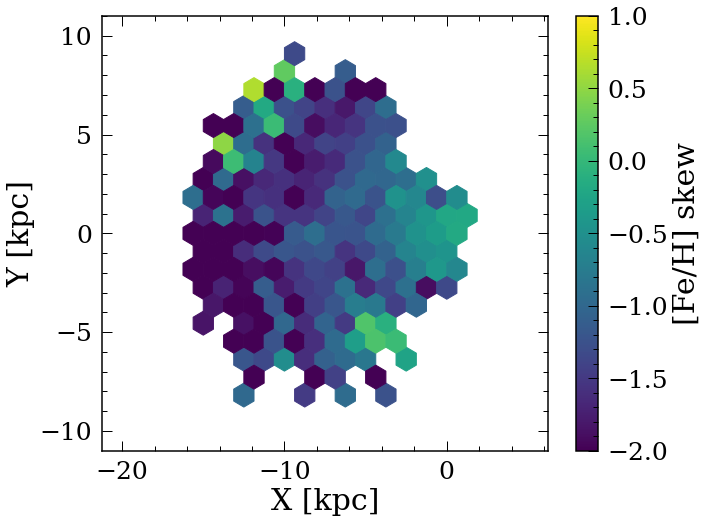

In [50]:
from scipy.stats import skew

plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['x'],apogee_kinematic['y'],apogee_kinematic['M_H'],
          extent=(-20,5,-10,10), vmin=-2,vmax=1, reduce_C_function=skew,
          gridsize=20, mincnt=50)
cb = plt.colorbar()
cb.set_label('[Fe/H] skew')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')

Text(0, 0.5, 'Y [kpc]')

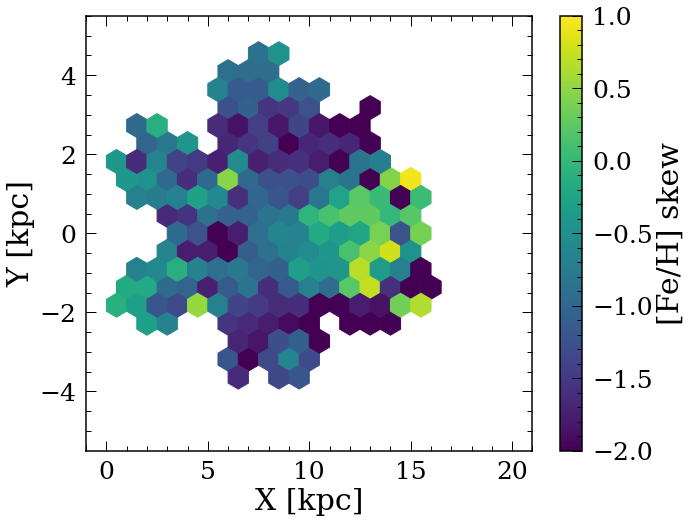

In [51]:
apogee_kinematic['R'] = np.sqrt(apogee_kinematic['x']**2+apogee_kinematic['y']**2)
from scipy.stats import skew

plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['R'],apogee_kinematic['z'],apogee_kinematic['M_H'],
          extent=(0,20,-5,5), vmin=-2,vmax=1, reduce_C_function=skew,
          gridsize=20, mincnt=50)
cb = plt.colorbar()
cb.set_label('[Fe/H] skew')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')



Text(0, 0.5, 'Y [kpc]')

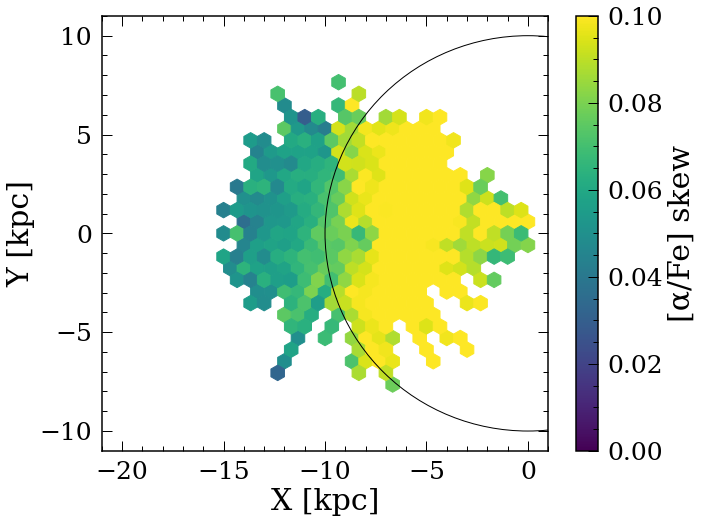

In [52]:
from scipy.stats import skew

plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['x'],apogee_kinematic['y'],apogee_kinematic['ALPHA_M'],
          extent=(-20,0,-10,10), vmin=0,vmax=0.1, reduce_C_function=np.std,
          gridsize=30, mincnt=50)

c = plt.Circle((0,0), 10, color='k', fill=False)
plt.gca().add_artist(c)

cb = plt.colorbar()
cb.set_label('[α/Fe] skew')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')


Text(0, 0.5, 'Y [kpc]')

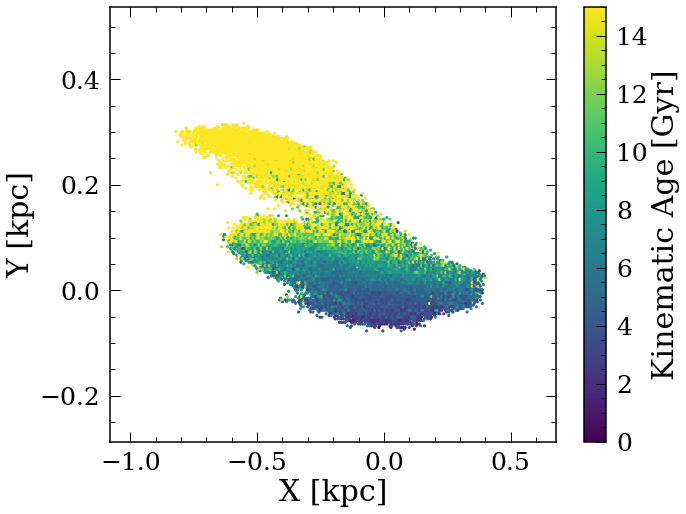

In [53]:
def calckinage(x):
    return np.exp(1.6*np.log(np.std(x))-2.8)

from scipy.stats import skew

plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['M_H'],apogee_kinematic['ALPHA_M'],
           apogee_kinematic['vz'],
          extent=(-1,0.6,-0.25,0.5), vmin=0,vmax=15, reduce_C_function=calckinage,
          gridsize=200, mincnt=10)

c = plt.Circle((0,0), 10, color='k', fill=False)
plt.gca().add_artist(c)

cb = plt.colorbar()
cb.set_label('Kinematic Age [Gyr]')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')



In [54]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random
import time
from tqdm import trange
from stardate.lhf import gk_rotation_model
import stardate
from itertools import product

mpf = 'aviary/data/metal_poor_avr.csv'
mrf = 'aviary/data/metal_rich_avr.csv'
af = 'aviary/data/all_stars_avr.csv'
def get_avr_coefficients():
    """
    Fit the parameters of the AVR using data from Yu & Liu:
    https://arxiv.org/pdf/1712.03965.pdf
    Fit to the relationship between log(sigma_z) and age.
    Returns:
        p_mp (array): coefficients [slope, intercept] for straight line fit to
            metal poor stars.
        p_mr (array): coefficients [slope, intercept] for straight line fit to
            metal rich stars.
        p_a (array): coefficients [slope, intercept] for straight line fit to
            all stars.
    """
    mp = pd.read_csv(mpf)
    mr = pd.read_csv(mrf)
    a = pd.read_csv(af)

    p_mp = np.polyfit(np.log(mp.sigma_z_kms), np.log(mp.Age_Gyr), 1)
    p_mr = np.polyfit(np.log(mr.sigma_z_kms), np.log(mr.Age_Gyr), 1)
    p_a = np.polyfit(np.log(a.sigma_z_kms), np.log(a.Age_Gyr), 1)

    return p_mp, p_mr, p_a

def v_to_age(v, coeffs):
    """
    Convert z velocity dispersion [km/s] to age [Gyr]
    Args:
        v (array): Z Velocity dispersion [km/s].
        coeffs (array): coefficients for straight line fit. [intercept, slope]
    Returns:
        age (array): age in Gyr.
    """
    b, a = coeffs
    logt = np.polyval(coeffs, np.log(v))
    return np.exp(logt)
 

import time
from tqdm import trange
# get average ages
def getkinAges(df,fs,binfs,min_star=5,max_star=30,vz='v_b'):
    countsNo=0
    df=df.reset_index(drop=True)
    fslen=len(fs)
    dflen=len(df)
    
    checkpara=np.zeros(fslen)
    paras=np.zeros((dflen,fslen))
    
    """
    # subtract MS
    z=[ 7.43269812e-21,-2.85871860e-16 ,4.37669326e-12,-3.47574268e-08,1.52548746e-04,
       -3.54673368e-01,3.51882114e+02]
    p = np.poly1d(z)
    for i in range(len(fs)):
        if 'abs_G' in fs[i]:
            df['abs_G_sub']=df['abs_G']-p(df['teff_calc'])
            fs[i]='abs_G_sub'
    """        
            
    for i in range(fslen):
        paras[:,i]=df[fs[i]].values
    
    vels=df[vz].values
    kin_age=np.zeros(len(df))
        

    for i in trange(dflen):
        
        mask=np.ones(dflen, dtype=bool)
        
        for j in range(fslen):
            checkpara[j]=paras[i,j]
            mask = mask & (abs(paras[:,j]-checkpara[j])<binfs[j]/2)
        vels_single=vels[mask]
        
        binfs_new=binfs
        switch=0
        while len(vels_single)<min_star:
            if any([binfs_new[jj]>2*binfs[jj] for jj in range(len(binfs))]):
                    break
            binfs_new=[i*1.1 for i in binfs_new]
            mask=np.ones(len(df), dtype=bool)
            mask=np.ones(dflen, dtype=bool)
            for j in range(fslen):
                checkpara[j]=paras[i,j]
                mask = mask & (abs(paras[:,j]-checkpara[j])<binfs_new[j]/2)
            vels_single=vels[mask]
            switch=1
            
        while len(vels_single)>max_star:
            if any([binfs_new[jj]<binfs[jj]/2 for jj in range(len(binfs))]):
                    break
            binfs_new=[i*0.9 for i in binfs_new]
            mask=np.ones(len(df), dtype=bool)
            mask=np.ones(dflen, dtype=bool)
            for j in range(fslen):
                checkpara[j]=paras[i,j]
                mask = mask & (abs(paras[:,j]-checkpara[j])<binfs_new[j]/2)
            vels_single=vels[mask]
            switch=1
            
        if switch==1:
            countsNo=countsNo+1
        
                
        kin_age[i]=1.5*np.median(abs(vels_single-np.median(vels_single)))
                
                
    p_mp, p_mr, p_a = get_avr_coefficients()
    df['vel_dis']=kin_age
    df['kin_age']=v_to_age(kin_age,p_mr)
    print(countsNo)
    return kin_age,v_to_age(kin_age,p_mr)

    

In [55]:
"""apogee_kinematic['vel_dis'],apogee_kinematic['kin_age']=getkinAges(apogee_kinematic,['M_H','ALPHA_M','teff','logg','N_FE','C_FE'],
                                              [0.1, 0.1, 100, 0.1, 0.1, 0.1],vz='vz',min_star=15,
                                               max_star=50000)


"""

"apogee_kinematic['vel_dis'],apogee_kinematic['kin_age']=getkinAges(apogee_kinematic,['M_H','ALPHA_M','teff','logg','N_FE','C_FE'],\n                                              [0.1, 0.1, 100, 0.1, 0.1, 0.1],vz='vz',min_star=15,\n                                               max_star=50000)\n\n\n"

In [56]:
#apogee_kinematic.to_csv('APOGEE_GAIADR3.csv', index=False)

In [57]:
apogee_kinematic = pd.read_csv('APOGEE_GAIADR3.csv')



In [58]:
apogee_kinematic.columns

Index(['x', 'y', 'z', 'vx', 'vy', 'vz', 'source_id_x', 'ra_x', 'dec', 'feh',
       'source_id_int', 'source_id_y', 'M_H', 'M_H_ERR', 'ALPHA_M',
       'ALPHA_M_ERR', 'ra_y', 'teff', 'logg', 'N_FE', 'C_FE', 'ID', 'CI_FE',
       'O_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'P_FE', 'S_FE', 'K_FE', 'CA_FE',
       'TI_FE', 'CR_FE', 'MN_FE', 'NI_FE', 'CU_FE', 'YB_FE', 'source_id_float',
       'source_id', 'kin_age', 'vel_dis'],
      dtype='object')

(-1.0, 0.5)

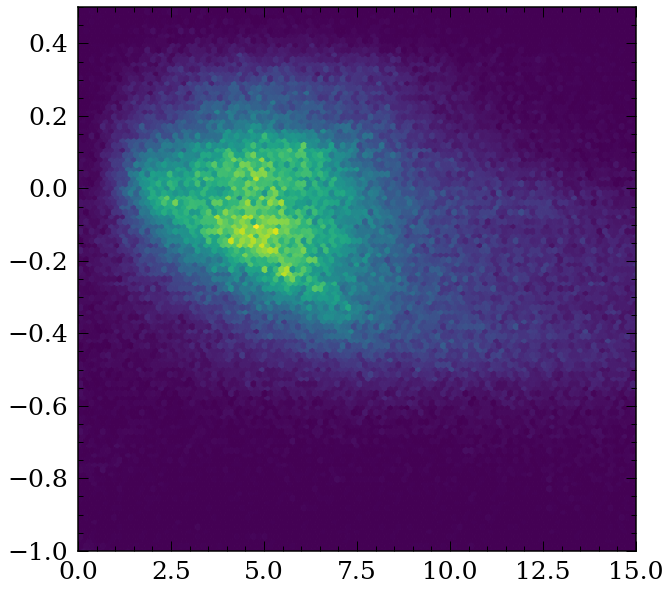

In [59]:


plt.hexbin(apogee_kinematic['kin_age'], apogee_kinematic['M_H'],
          extent=(0,15,-1,0.5),)
plt.xlim([0,15])
plt.ylim([-1,0.5])



In [151]:
H, yedges, xedges = np.histogram2d(apogee_kinematic['kin_age'], 
                                   apogee_kinematic['M_H'], 
                                   bins=(np.linspace(0,25,50),
                                    np.linspace(-1,0.5,50)))
for i in trange(len(yedges)-1):
    m = (apogee_kinematic['kin_age']>yedges[i])&(apogee_kinematic['kin_age']<yedges[i+1])
    H[i,:] = H[i,:]/sum(m)
    
for i in range(len(H[0,:])):
    for j in range(len(H[:,0])):
        if H[j,i] == 0:
            H[j,i] = np.nan


100%|██████████| 49/49 [00:01<00:00, 43.88it/s]


Text(0, 0.5, '[Fe/H]')

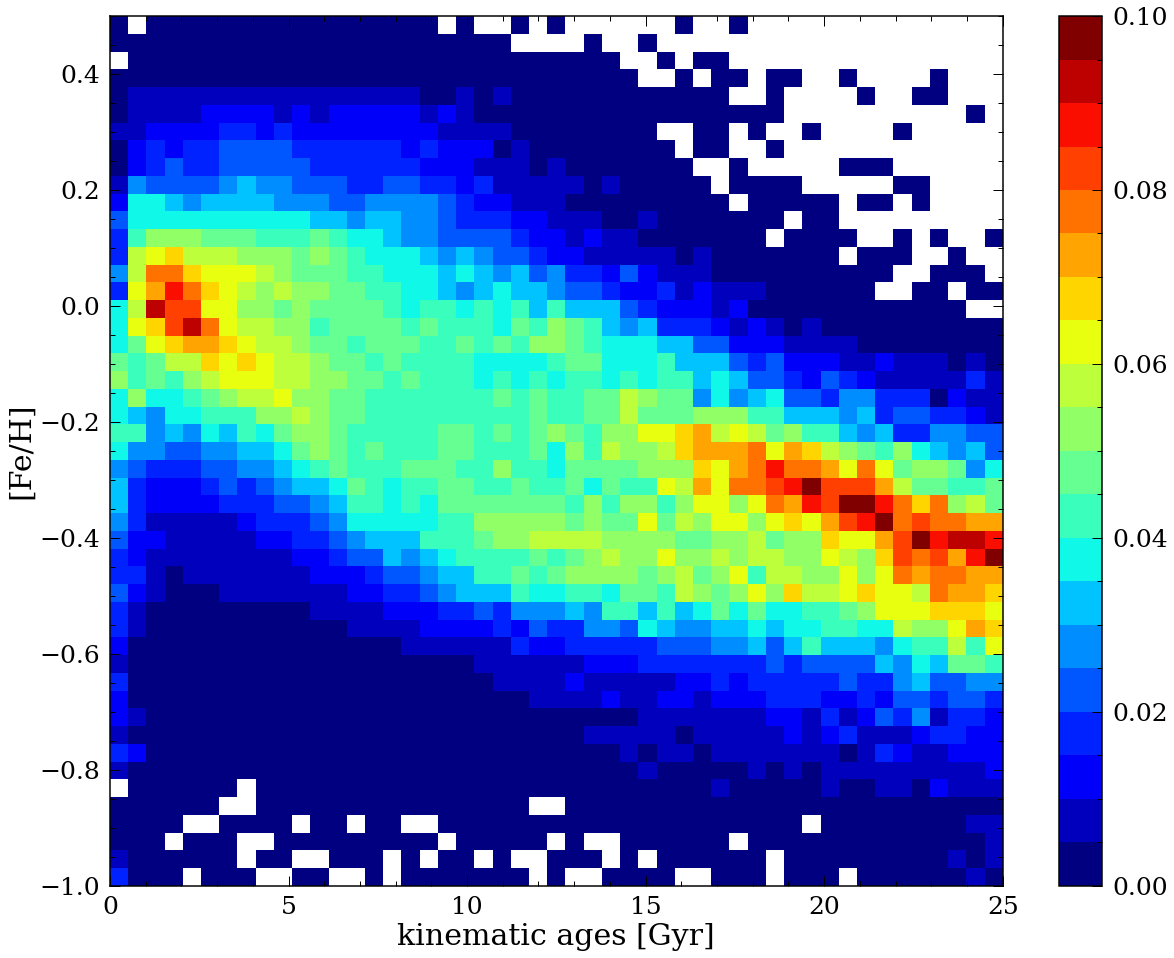

In [153]:
cmap1 = plt.cm.get_cmap('jet',20)
cmap1.set_bad('white',1.)

plt.figure(figsize=(20,16))
plt.pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.1)
cb = plt.colorbar()

plt.xlim([0,25])
plt.ylim([-1,0.5])

plt.xlabel('kinematic ages [Gyr]')
plt.ylabel('[Fe/H]')

Text(0.5, 0, '[Fe/H]')

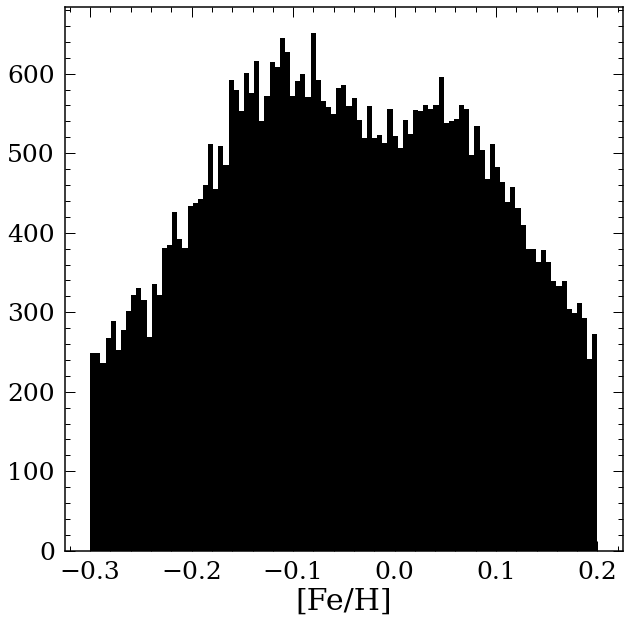

In [154]:
m = abs(apogee_kinematic['kin_age']-4)<1
plt.hist(apogee_kinematic['M_H'][m], bins=np.linspace(-0.3,0.2,100), 
         color='k');
plt.xlabel('[Fe/H]')

# compare with APOGEE Lu+2022

In [112]:
lu2022 = pd.read_pickle('../SecondYear/CannonDR16_cut.pkl')
lu2022['ra'] = lu2022['RA']
lu2022['dec'] = lu2022['DEC']

In [113]:
lu2022 = pd.merge(lu2022, apogee_kinematic[['ID','kin_age']], left_on='APOGEE_ID',
                 right_on='ID',how='inner')
lu2022

ID_x    [Fe/H]      T_{eff}    Log(g)   [Mg/Fe]  \
0      2M19442871+4103173  0.135666  4595.679646  2.670362  0.027533   
1      2M19444192+4105009 -0.046807  4788.838124  2.380956  0.075182   
2      2M19444281+4111043 -0.447567  4854.778433  2.578371  0.099785   
3      2M19444489+4116177  0.083954  4865.254184  2.646958 -0.076475   
4      2M19450118+4135207  0.008879  4572.659167  2.410126  0.121836   
...                   ...       ...          ...       ...       ...   
40308  2M15321226+4359404 -0.425543  4728.588523  2.685028  0.305027   
40309  2M15340150+4317306 -0.265547  4715.377804  2.728611  0.270722   
40310  2M15343532+4331285 -0.021317  4562.942519  2.424942  0.031869   
40311  2M15345356+4425018 -0.500729  4761.223077  2.695497  0.308284   
40312  2M15361301+4310171 -0.053679  4666.960191  2.601680  0.063284   

               DP       Dnu    LogAge  [Fe/H]_err  T_{eff}_err  ...       ecc  \
0       94.530799  6.238070  3.776164    0.010265     0.021346  ...  0.144235   
1      183.593174  3.891220  3.580927    0.013556     0.028918  ...  0.236165   
2      127.999199  5.270809  3.655984    0.016608     0.038078  ...  0.061018   
3      229.132297  5.317794  3.592127    0.012513     0.028783  ...  0.151536   
4      285.456890  3.928058  3.702256    0.011802     0.020920  ...  0.114416   
...           ...       ...       ...         ...          ...  ...       ...   
40308  104.188622  7.457660  3.946090    0.019652     0.043012  ...  0.788961   
40309   69.679657  8.521639  3.997966    0.021427     0.049209  ...  0.229669   
40310  110.293007  3.087101  3.916447    0.010866     0.020503  ...  0.243442   
40311   97.110769  7.536125  3.936926    0.018678     0.043083  ...  0.387655   
40312   41.515366  5.993795  3.867507    0.011334     0.024349  ...  0.163882   

             Rg  LogAge_err_Gyr  LogAge_Gyr  Age_err_cannon  Age_err_CV  \
0      6.801691       -2.944999    0.776164        0.001135    1.479108   
1      8.395411       -2.917361    0.580927        0.001210    1.479108   
2      7.500586       -2.927371    0.655984        0.001182    1.479108   
3      8.348451       -2.924559    0.592127        0.001190    1.479108   
4      7.128074       -2.937603    0.702256        0.001155    1.479108   
...         ...             ...         ...             ...         ...   
40308  1.308302       -2.913168    0.946090        0.001221    1.479108   
40309  8.541427       -2.902846    0.997966        0.001251    1.479108   
40310  9.738715       -2.952255    0.916447        0.001116    1.479108   
40311  4.782160       -2.916051    0.936926        0.001213    1.479108   
40312  8.028285       -2.942314    0.867507        0.001142    1.479108   

               ra        dec                ID_y    kin_age  
0      296.119643  41.054829  2M19442871+4103173   7.194187  
1      296.174702  41.083584  2M19444192+4105009   7.984372  
2      296.178405  41.184532  2M19444281+4111043   8.745540  
3      296.187057  41.271595  2M19444489+4116177   2.940784  
4      296.254940  41.589108  2M19450118+4135207  12.292448  
...           ...        ...                 ...        ...  
40308  233.051119  43.994564  2M15321226+4359404  13.141944  
40309  233.506267  43.291855  2M15340150+4317306  16.627755  
40310  233.647199  43.524593  2M15343532+4331285  14.333947  
40311  233.723204  44.417191  2M15345356+4425018  39.496185  
40312  234.054233  43.171432  2M15361301+4310171   8.632858  

[40313 rows x 242 columns]

Text(0, 0.5, 'Kinematic Ages [Gyr]')

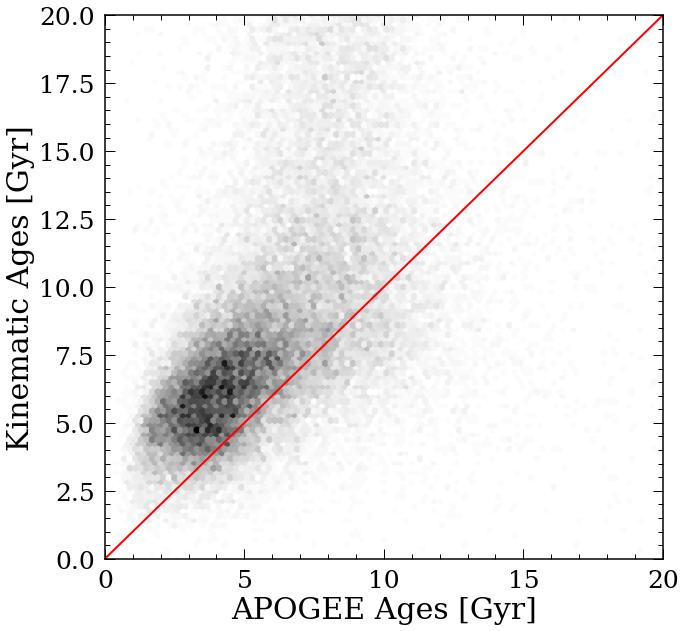

In [114]:
uplim = 20
plt.hexbin(lu2022['Age'], lu2022['kin_age'], extent=(0,uplim,0,uplim), 
          cmap='binary')
plt.plot([0,uplim], [0,uplim], 'r-')
plt.xlim([0,uplim])
plt.ylim([0,uplim])
plt.xlabel('APOGEE Ages [Gyr]')
plt.ylabel('Kinematic Ages [Gyr]')


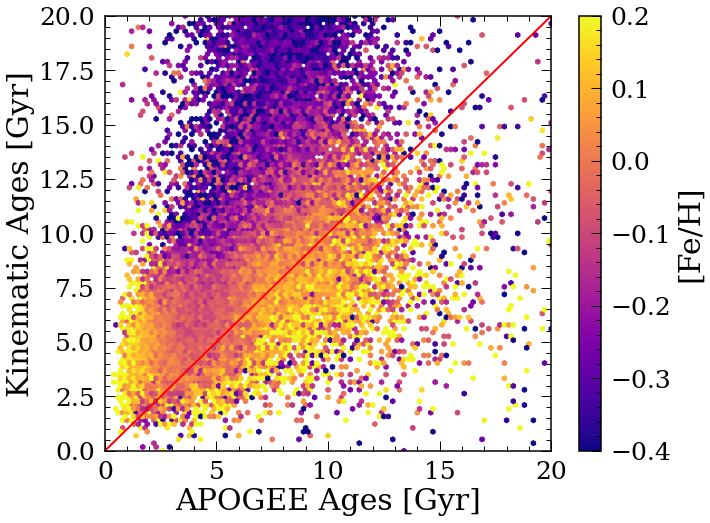

In [115]:
plt.figure(figsize=(10, 8))
uplim = 20
plt.hexbin(lu2022['Age'], lu2022['kin_age'], C=lu2022['M_H'],
           extent=(0,uplim,0,uplim), vmin=-0.4, vmax=0.2,
          cmap='plasma')
plt.plot([0,uplim], [0,uplim], 'r-')
plt.xlim([0,uplim])
plt.ylim([0,uplim])
plt.xlabel('APOGEE Ages [Gyr]')
plt.ylabel('Kinematic Ages [Gyr]')


cb = plt.colorbar()
cb.set_label('[Fe/H]')


In [134]:
# col normalized 
H, yedges, xedges = np.histogram2d(lu2022['Age'], 
                                   lu2022['M_H'], 
                                   bins=(np.linspace(2,20,50),
                                    np.linspace(-1,0.5,50)))
for i in trange(len(yedges)-1):
    m = (lu2022['Age']>yedges[i])&(lu2022['Age']<yedges[i+1])
    H[i,:] = H[i,:]/sum(m)
    
for i in range(len(H[0,:])):
    for j in range(len(H[:,0])):
        if H[j,i] == 0:
            H[j,i] = np.nan



100%|██████████| 49/49 [00:00<00:00, 310.24it/s]


Text(0, 0.5, '[Fe/H]')

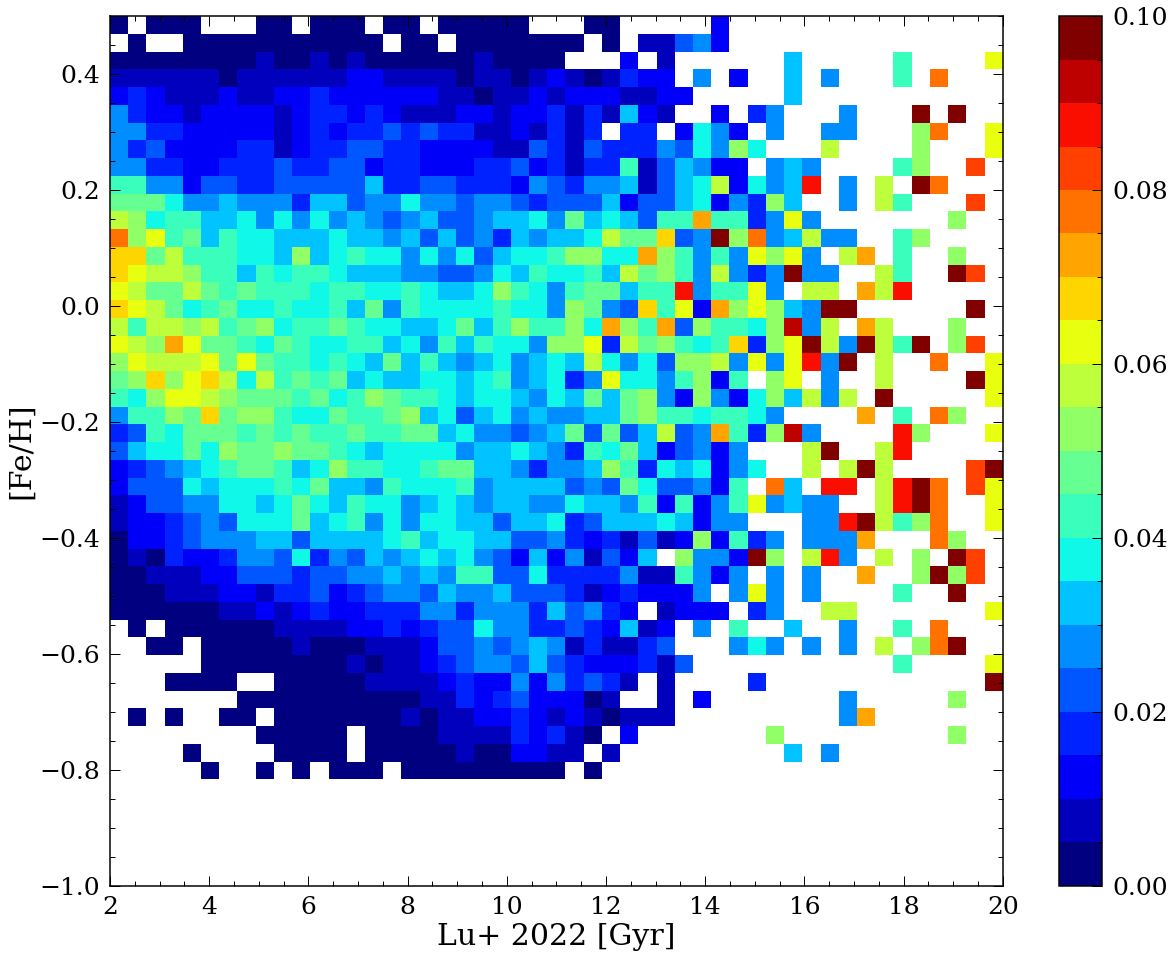

In [135]:
cmap1 = plt.cm.get_cmap('jet',20)
cmap1.set_bad('white',1.)

plt.figure(figsize=(20,16))
plt.pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.1)
cb = plt.colorbar()

plt.xlim([2,20])
plt.ylim([-1,0.5])

plt.xlabel('Lu+ 2022 [Gyr]')
plt.ylabel('[Fe/H]')

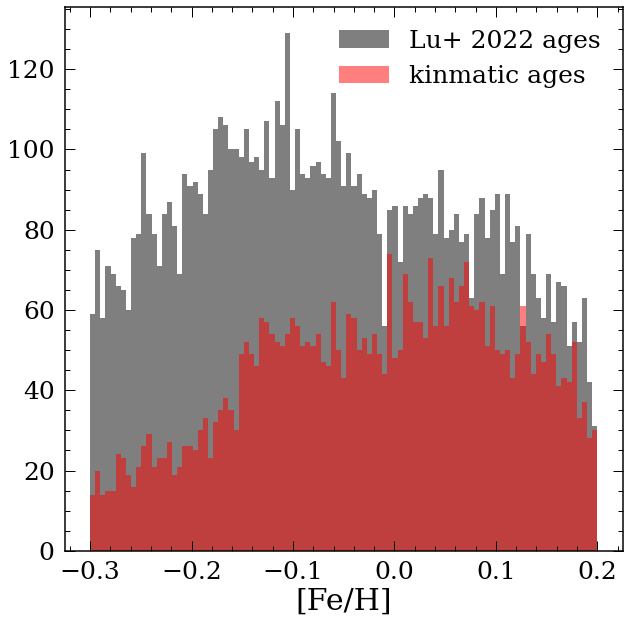

In [165]:
m = abs(lu2022['Age']-4)<1
plt.hist(lu2022['M_H'][m], bins=np.linspace(-0.3,0.2,100), 
         color='k',alpha=0.5,label='Lu+ 2022 ages');
plt.xlabel('[Fe/H]')


m = abs(lu2022['kin_age']-4)<1
plt.hist(lu2022['M_H'][m], bins=np.linspace(-0.3,0.2,100), 
         color='r', alpha=0.5,label='kinmatic ages');
plt.xlabel('[Fe/H]')

plt.legend()

In [137]:
# col normalized 
H, yedges, xedges = np.histogram2d(lu2022['kin_age'], 
                                   lu2022['M_H'], 
                                   bins=(np.linspace(2,20,50),
                                    np.linspace(-1,0.5,50)))
for i in trange(len(yedges)-1):
    m = (lu2022['kin_age']>yedges[i])&(lu2022['kin_age']<yedges[i+1])
    H[i,:] = H[i,:]/sum(m)
    
for i in range(len(H[0,:])):
    for j in range(len(H[:,0])):
        if H[j,i] == 0:
            H[j,i] = np.nan




100%|██████████| 49/49 [00:00<00:00, 311.59it/s]


Text(0, 0.5, '[Fe/H]')

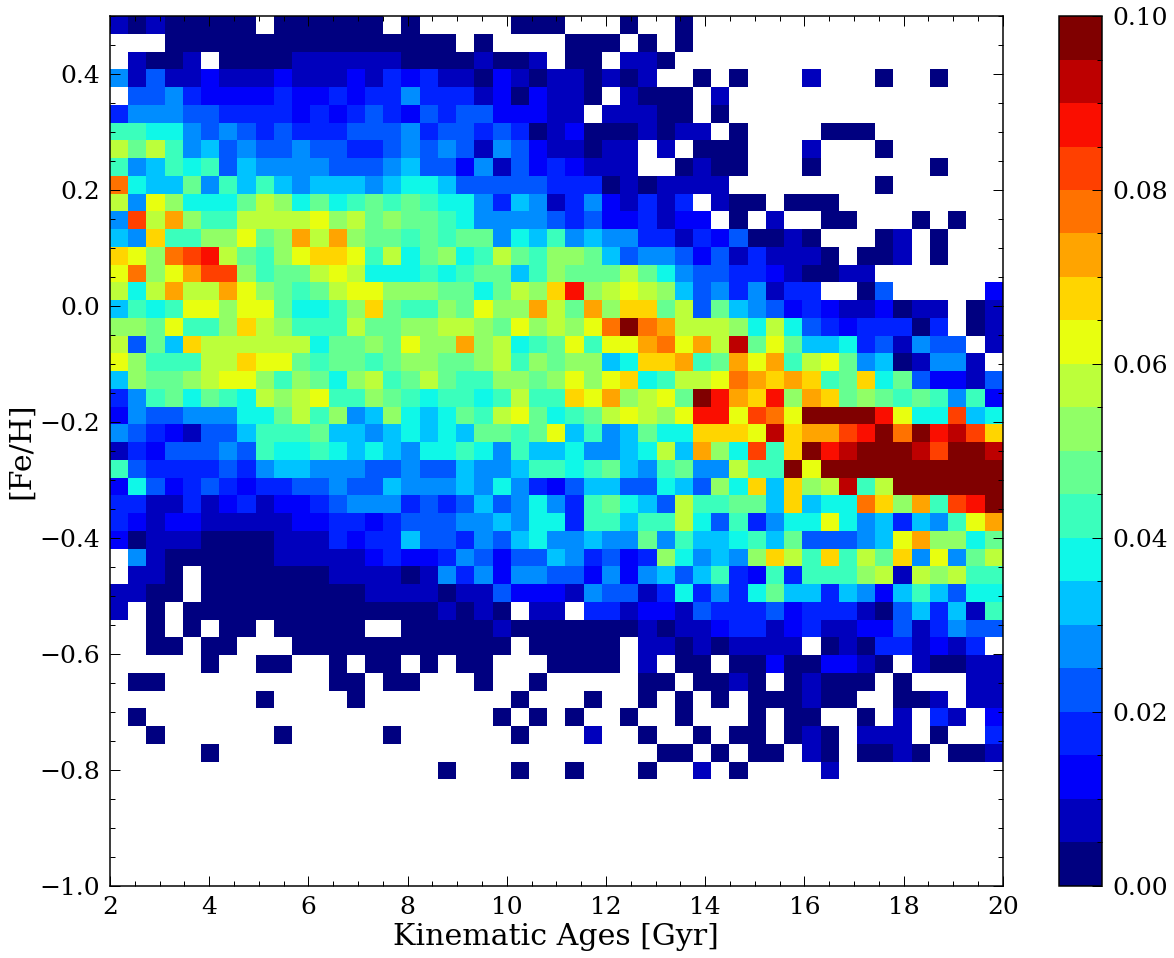

In [138]:
cmap1 = plt.cm.get_cmap('jet',20)
cmap1.set_bad('white',1.)

plt.figure(figsize=(20,16))
plt.pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.1)
cb = plt.colorbar()

plt.xlim([2,20])
plt.ylim([-1,0.5])

plt.xlabel('Kinematic Ages [Gyr]')
plt.ylabel('[Fe/H]')

# compare with Xiang 2022

In [25]:
from astropy.io import ascii
data = ascii.read("41586_2022_4496_MOESM3_ESM.txt")  
xiang2022 = data.to_pandas()


In [26]:
xiang2022 = pd.merge(xiang2022, apogee_kinematic, left_on='col14',
                     right_on='source_id_int',how='inner')
xiang2022

Empty DataFrame
Columns: [col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15, col16, col17, col18, col19, col20, col21, col22, col23, col24, col25, col26, x, y, z, vx, vy, vz, source_id_x, ra_x, dec, feh, source_id_int, source_id_y, M_H, M_H_ERR, ALPHA_M, ALPHA_M_ERR, ra_y, teff, logg, N_FE, C_FE, ID, CI_FE, O_FE, MG_FE, AL_FE, SI_FE, P_FE, S_FE, K_FE, CA_FE, TI_FE, CR_FE, MN_FE, NI_FE, CU_FE, YB_FE, source_id_float, source_id, kin_age, vel_dis]
Index: []

[0 rows x 67 columns]

# compare with APOCASK

In [71]:
apocask = ascii.read('apjsaaebfdt5_mrt.txt').to_pandas()
apocask = pd.merge(apocask, apogee_kinematic, left_on='2MASS',
                  right_on='ID', how='inner')

In [61]:
"""source_id_uniq = apocask.source_id_x.unique()
ASages = np.zeros(len(source_id_uniq))
ASages_err = np.zeros(len(source_id_uniq))
kin_age = np.zeros(len(source_id_uniq))
feh = np.zeros(len(source_id_uniq))

for i in trange(len(source_id_uniq)):
    df_sing = apocask.loc[apocask['source_id_x']==source_id_uniq[i]]
    allages = np.power(10, df_sing['LogAge'])/1000
    #print(allages)
    ASages[i] = np.mean(allages)
    ASages_err[i] = max(allages)-min(allages)
    kin_age[i] = np.mean(df_sing['kin_age'])
    feh[i] = np.mean(df_sing['M_H'])"""

"source_id_uniq = apocask.source_id_x.unique()\nASages = np.zeros(len(source_id_uniq))\nASages_err = np.zeros(len(source_id_uniq))\nkin_age = np.zeros(len(source_id_uniq))\nfeh = np.zeros(len(source_id_uniq))\n\nfor i in trange(len(source_id_uniq)):\n    df_sing = apocask.loc[apocask['source_id_x']==source_id_uniq[i]]\n    allages = np.power(10, df_sing['LogAge'])/1000\n    #print(allages)\n    ASages[i] = np.mean(allages)\n    ASages_err[i] = max(allages)-min(allages)\n    kin_age[i] = np.mean(df_sing['kin_age'])\n    feh[i] = np.mean(df_sing['M_H'])"

In [73]:
apocask.columns

Index(['KIC', '2MASS_x', 'Teff', 'e_Teff', 'FeH', 'e_FeH', 'AFe', 'e_AFe',
       'Nmax', 'e_Nmax', 'Dnu', 'e_Dnu', 'ES', 'Fdnu', 'e_Fdnu', 'M(cor)',
       'e_M(cor)-ran', 'e_M(cor)-sys', 'R(cor)', 'e_R(cor)-ran',
       'e_R(cor)-sys', 'logg(seis)', 'e_logg(seis)-ran', 'e_logg(seis)-sys',
       'Rho', 'e_Rho-ran', 'e_Rho-sys', 'LogAge', 'E_LogAge', 'e_LogAge', 'Av',
       'e_Av', 'Notes', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'source_id_x', 'ra_x',
       'dec', 'feh', 'source_id_int', 'source_id_y', 'M_H', 'M_H_ERR',
       'ALPHA_M', 'ALPHA_M_ERR', 'ra_y', 'teff', 'logg', 'N_FE', 'C_FE', 'ID',
       'CI_FE', 'O_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'P_FE', 'S_FE', 'K_FE',
       'CA_FE', 'TI_FE', 'CR_FE', 'MN_FE', 'NI_FE', 'CU_FE', 'YB_FE',
       'source_id_float', 'source_id', 'kin_age', 'vel_dis', '2MASS_y'],
      dtype='object')

Text(0, 0.5, 'Kinematic Ages [Gyr]')

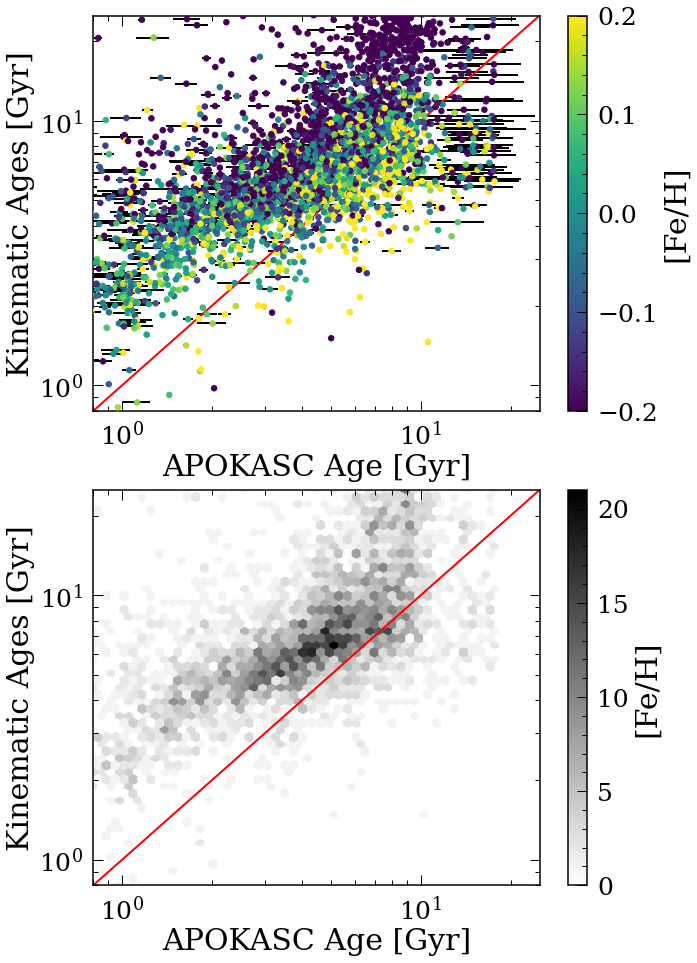

In [92]:
apocask['Age'] = np.power(10,apocask['LogAge'])/1000
apocask['Age_err'] = ((np.power(10,apocask['LogAge']+apocask['E_LogAge'])/1000)-\
                      (np.power(10,apocask['LogAge']-apocask['e_LogAge'])/1000))/2

plt.figure(figsize=(10,16))
plt.subplot(2,1,1)
plt.errorbar(apocask['Age'], apocask['kin_age'], xerr=apocask['Age_err'], fmt = 'k.')
plt.scatter(apocask['Age'], apocask['kin_age'], c=apocask['M_H'], 
            s=30, vmin=-0.2, vmax=0.2, zorder=10)
plt.xlim([0.8,25])
plt.ylim([0.8,25])
plt.plot([0.8,25], [0.8,25], 'r-')

cb = plt.colorbar()
cb = cb.set_label('[Fe/H]')

plt.yscale('log')
plt.xscale('log')

plt.xlabel('APOKASC Age [Gyr]')
plt.ylabel('Kinematic Ages [Gyr]')

plt.subplot(2,1,2)
plt.hexbin(apocask['Age'], apocask['kin_age'], 
           extent=(np.log10(0.8),np.log10(25),np.log10(0.8),np.log10(25)),
          xscale='log', yscale='log', gridsize=50, cmap='binary')
plt.xlim([0.8,25])
plt.ylim([0.8,25])
plt.plot([0.8,25], [0.8,25], 'r-')

cb = plt.colorbar()
cb = cb.set_label('[Fe/H]')

plt.yscale('log')
plt.xscale('log')

plt.xlabel('APOKASC Age [Gyr]')
plt.ylabel('Kinematic Ages [Gyr]')



# Gradients

In [180]:
apogee_kinematic = pd.read_csv('APOGEE_GAIADR3.csv')
len(apogee_kinematic)

327224

In [181]:
apogee_kinematic = apogee_kinematic.loc[apogee_kinematic['kin_age']<25].reset_index(drop=True)

apogee_kinematic['R'] = np.sqrt(apogee_kinematic['x']**2+apogee_kinematic['y']**2)

In [182]:
diskapogee = apogee_kinematic.loc[abs(apogee_kinematic['z'])<0.5].reset_index(drop=True)
len(diskapogee)

176068

Text(0, 0.5, 'Y')

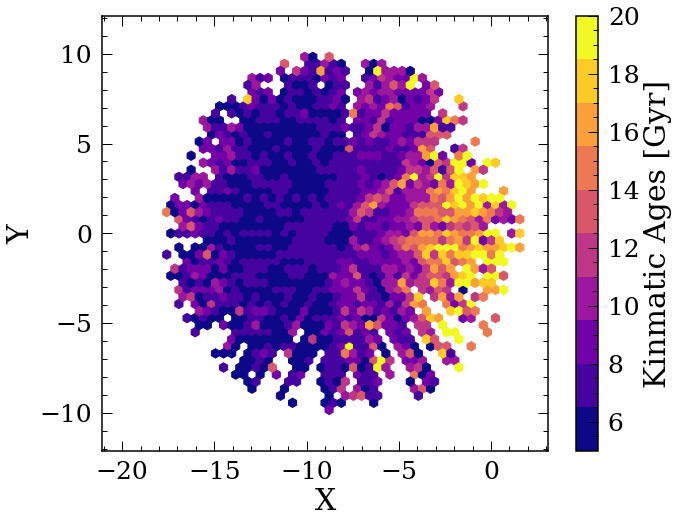

In [231]:
m = (abs(apogee_kinematic['z'])<0.5)

plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['x'], apogee_kinematic['y'],
           C=apogee_kinematic['kin_age'],vmin=5, vmax=20,
          extent=(-20,2,-11,11), gridsize=50, mincnt=1,
           reduce_C_function=np.median, cmap = plt.cm.get_cmap('plasma',10))
cb = plt.colorbar()
cb.set_label('Kinmatic Ages [Gyr]')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Z')

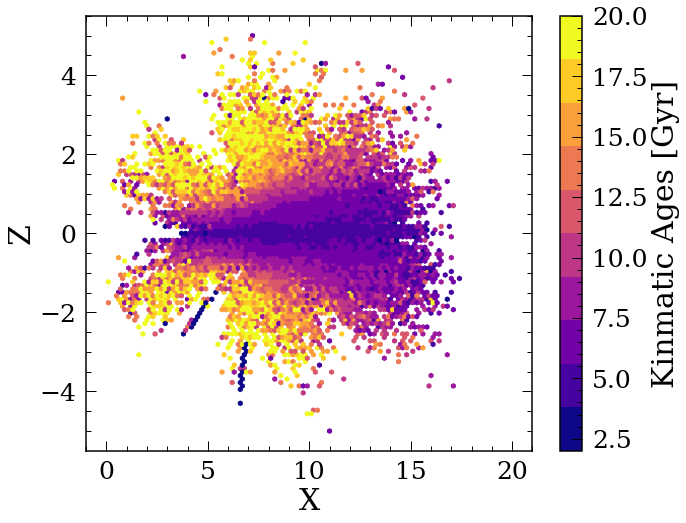

In [7]:
plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['R'], apogee_kinematic['z'],
           C=apogee_kinematic['kin_age'],vmin=2, vmax=20,
          extent=(0, 20, -5, 5), gridsize=100, mincnt=1, 
           reduce_C_function=np.median, cmap = plt.cm.get_cmap('plasma',10))
cb = plt.colorbar()
cb.set_label('Kinmatic Ages [Gyr]')
plt.xlabel('X')
plt.ylabel('Z')


(-0.25, 0.5)

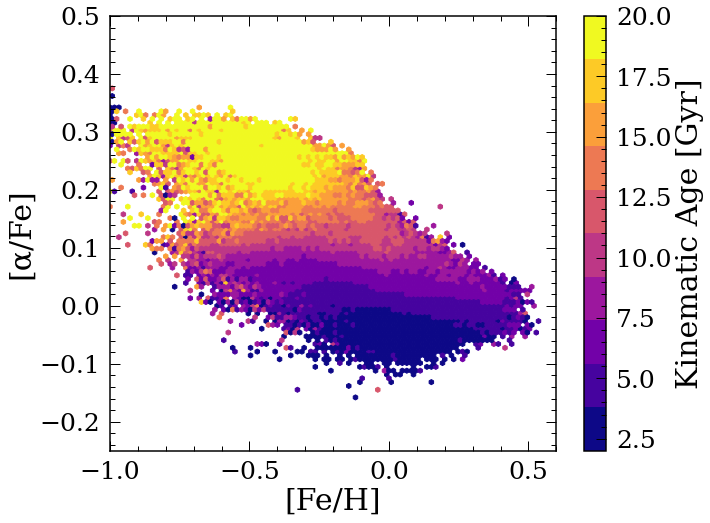

In [8]:
plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['M_H'],apogee_kinematic['ALPHA_M'],
           apogee_kinematic['kin_age'],reduce_C_function=np.median,
          extent=(-1,0.6,-0.25,0.5), vmin=2, vmax=20, 
          gridsize=100, mincnt=1, cmap = plt.cm.get_cmap('plasma',10))

cb = plt.colorbar()
cb.set_label('Kinematic Age [Gyr]')
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
plt.xlim([-1,0.6])
plt.ylim([-0.25,0.5])


(-0.25, 0.5)

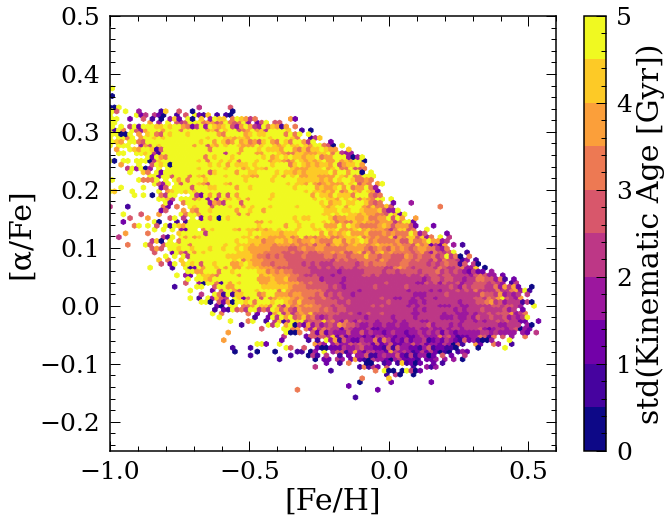

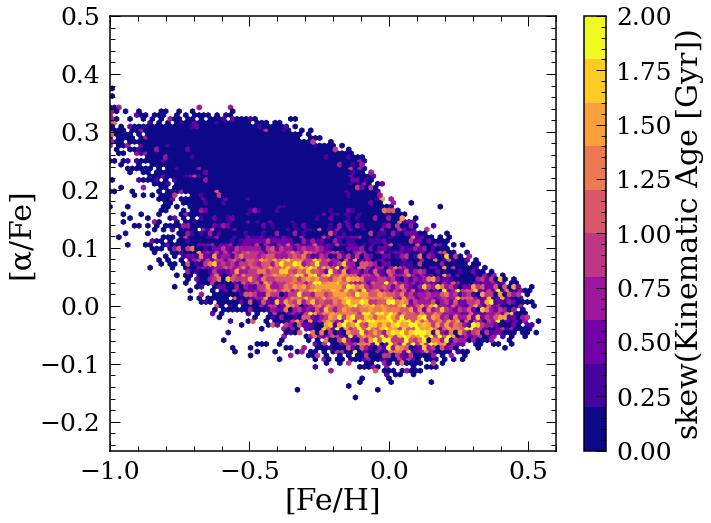

In [313]:
plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['M_H'],apogee_kinematic['ALPHA_M'],
           apogee_kinematic['kin_age'],reduce_C_function=np.std,
          extent=(-1,0.6,-0.25,0.5), vmin=0, vmax=5, 
          gridsize=100, mincnt=1, cmap = plt.cm.get_cmap('plasma',10))

cb = plt.colorbar()
cb.set_label('std(Kinematic Age [Gyr])')
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
plt.xlim([-1,0.6])
plt.ylim([-0.25,0.5])


from scipy.stats import skew
plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['M_H'],apogee_kinematic['ALPHA_M'],
           apogee_kinematic['kin_age'],reduce_C_function=skew,
          extent=(-1,0.6,-0.25,0.5), vmin=0, vmax=2, 
          gridsize=100, mincnt=1, cmap = plt.cm.get_cmap('plasma',10))

cb = plt.colorbar()
cb.set_label('skew(Kinematic Age [Gyr])')
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
plt.xlim([-1,0.6])
plt.ylim([-0.25,0.5])






In [9]:
ms = (apogee_kinematic['kin_age']>15)
ms = ms|((apogee_kinematic['kin_age']<15)&(apogee_kinematic['M_H']<0))
#ms = (apogee_kinematic['kin_age']<15)&(apogee_kinematic['M_H']>0)


In [10]:
H, yedges, xedges = np.histogram2d(apogee_kinematic['kin_age'][ms], 
                                   apogee_kinematic['ALPHA_M'][ms], 
                                   bins=(np.linspace(0,25,200),
                                    np.linspace(-0.25,0.5,200)))
for i in trange(len(yedges)-1):
    m = (apogee_kinematic['kin_age'][ms]>yedges[i])&(apogee_kinematic['kin_age'][ms]<yedges[i+1])
    H[i,:] = H[i,:]/sum(m)
    
for i in range(len(H[0,:])):
    for j in range(len(H[:,0])):
        if H[j,i] == 0:
            H[j,i] = np.nan

cmap1 = plt.cm.get_cmap('jet',13)
cmap1.set_bad('white',1.)

100%|██████████| 199/199 [00:03<00:00, 58.35it/s]


(-0.25, 0.5)

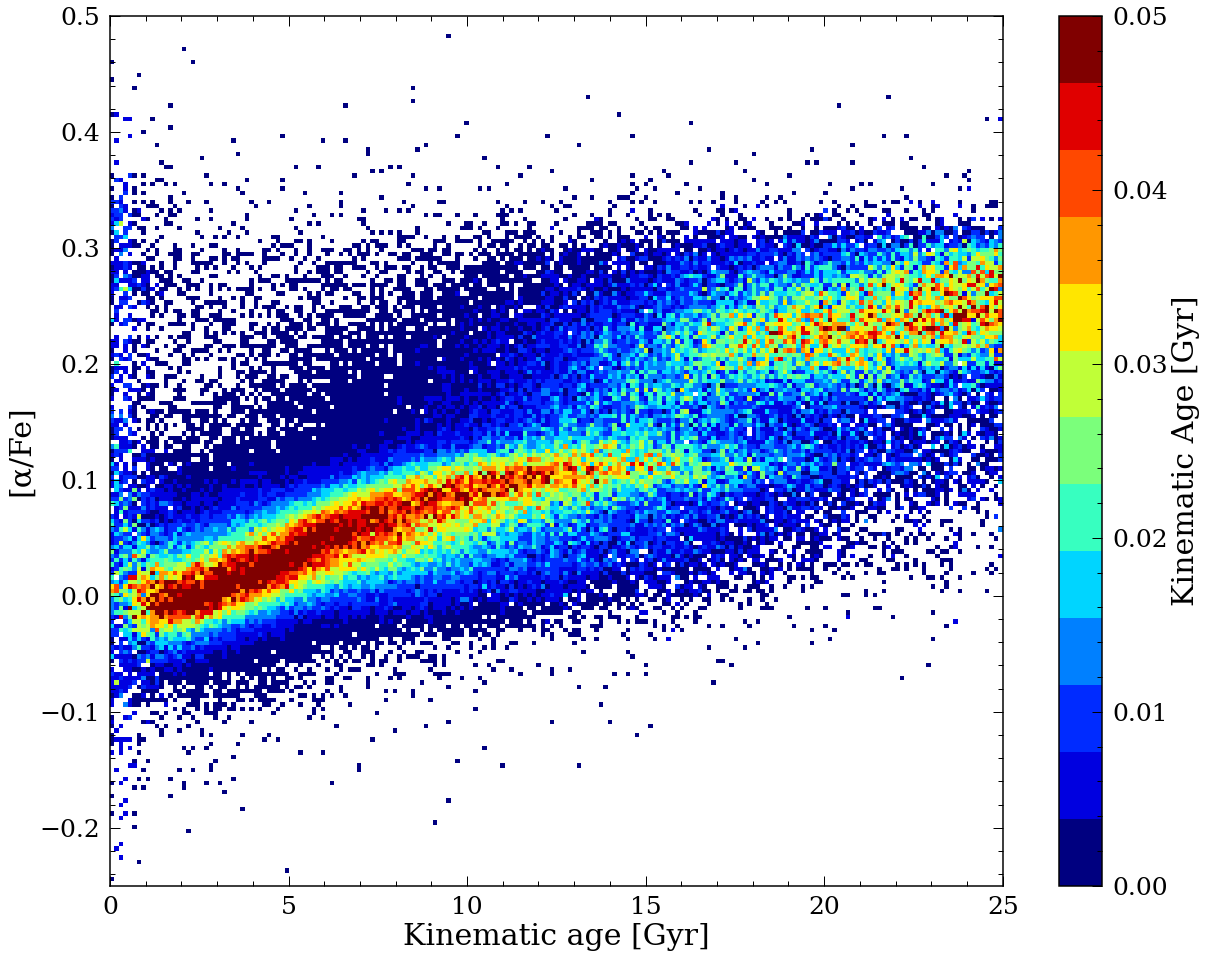

In [11]:
plt.figure(figsize=(20,16))
plt.pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.05)
cb = plt.colorbar()

cb.set_label('Kinematic Age [Gyr]')
plt.xlabel('Kinematic age [Gyr]')
plt.ylabel('[α/Fe]')
plt.xlim([0,25])
plt.ylim([-0.25,0.5])

(-0.25, 0.5)

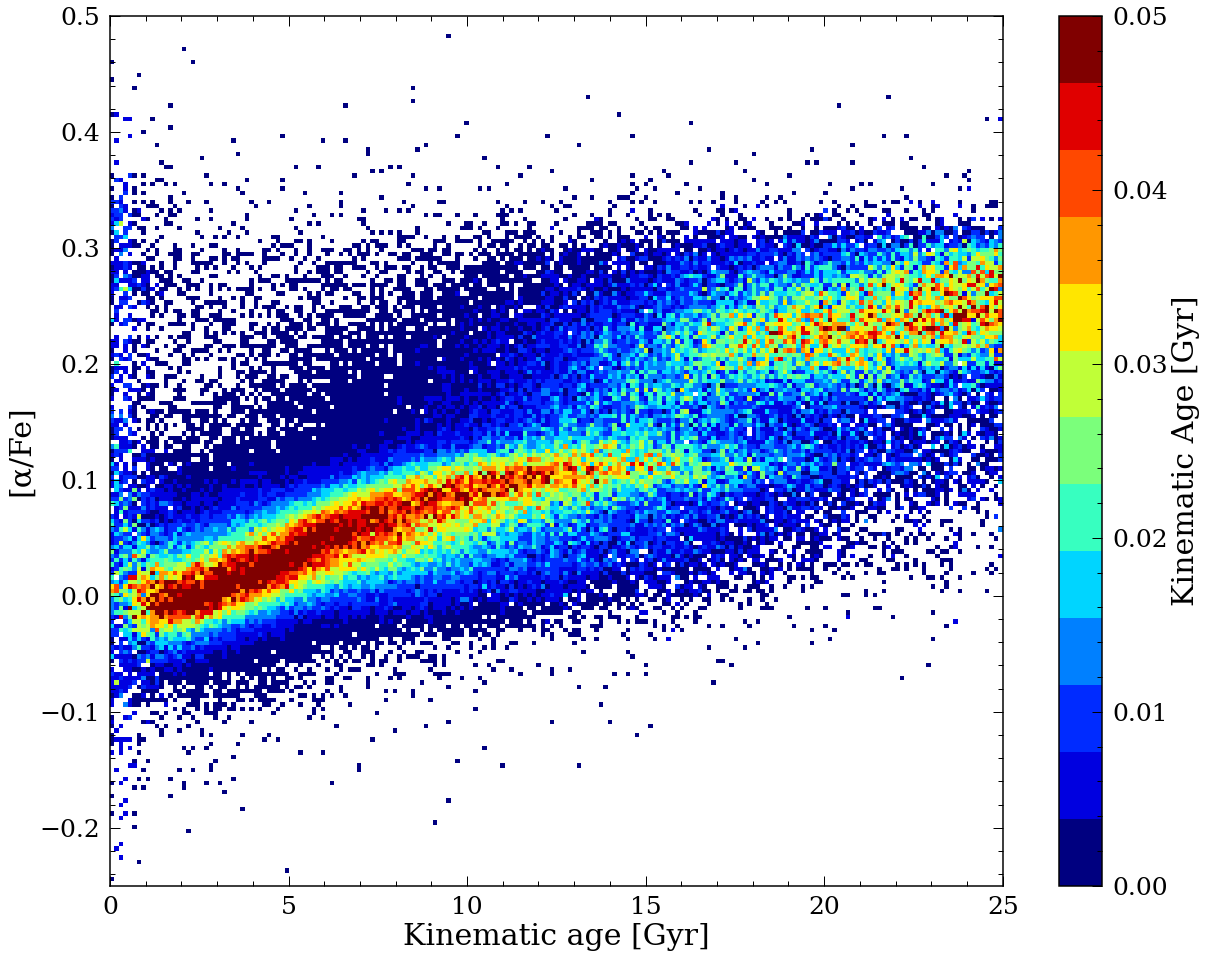

In [12]:
plt.figure(figsize=(20,16))
plt.pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.05)
cb = plt.colorbar()

cb.set_label('Kinematic Age [Gyr]')
plt.xlabel('Kinematic age [Gyr]')
plt.ylabel('[α/Fe]')
plt.xlim([0,25])
plt.ylim([-0.25,0.5])

In [13]:
H, yedges, xedges = np.histogram2d(apogee_kinematic['kin_age'], 
                                   apogee_kinematic['ALPHA_M'], 
                                   bins=(np.linspace(0,25,200),
                                    np.linspace(-0.25,0.5,200)))
for i in trange(len(yedges)-1):
    m = (apogee_kinematic['kin_age']>yedges[i])&(apogee_kinematic['kin_age']<yedges[i+1])
    H[i,:] = H[i,:]/sum(m)
    
for i in range(len(H[0,:])):
    for j in range(len(H[:,0])):
        if H[j,i] == 0:
            H[j,i] = np.nan

cmap1 = plt.cm.get_cmap('jet',13)
cmap1.set_bad('white',1.)

100%|██████████| 199/199 [00:03<00:00, 55.27it/s]


(-0.25, 0.5)

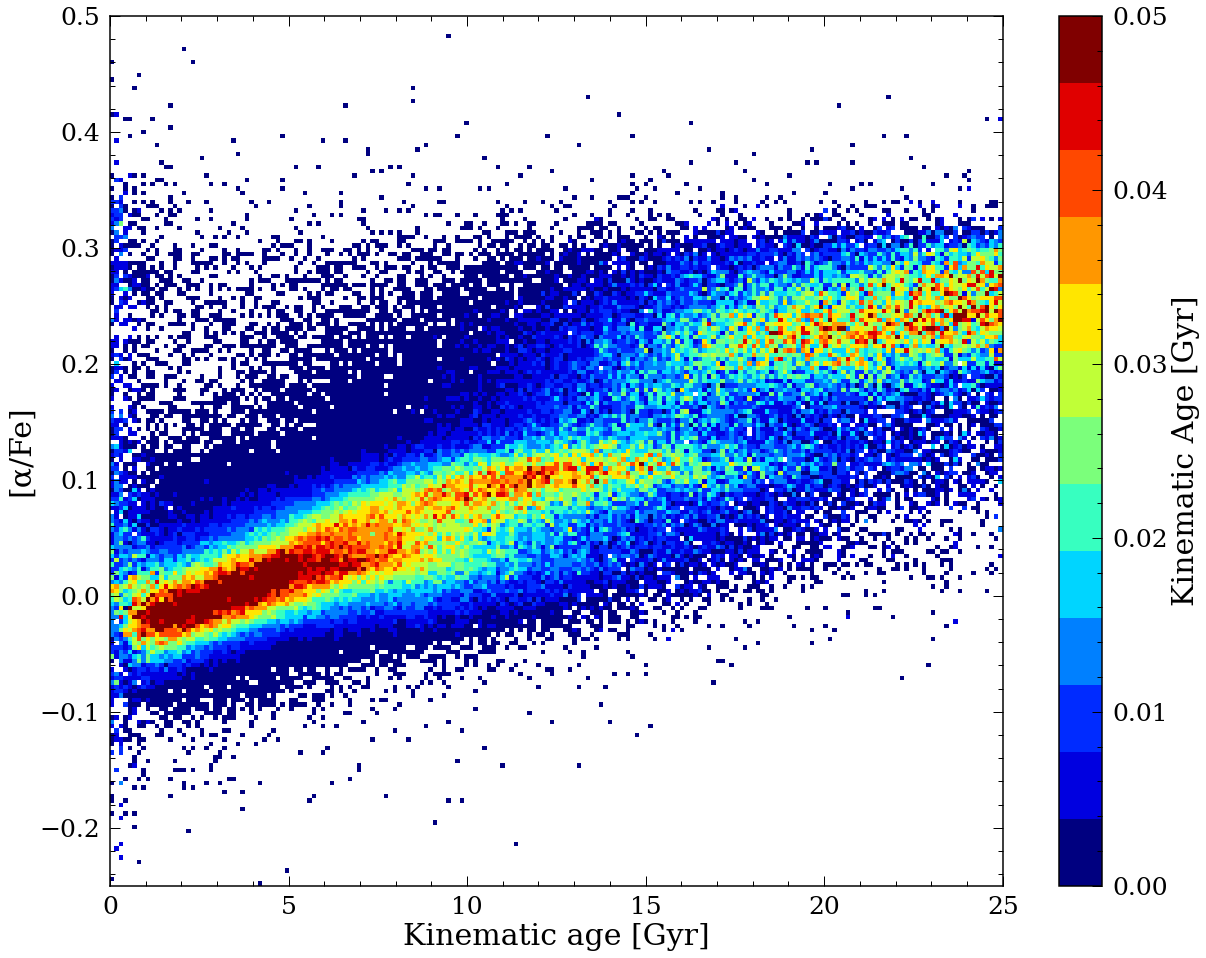

In [14]:
plt.figure(figsize=(20,16))
plt.pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.05)
cb = plt.colorbar()

cb.set_label('Kinematic Age [Gyr]')
plt.xlabel('Kinematic age [Gyr]')
plt.ylabel('[α/Fe]')
plt.xlim([0,25])
plt.ylim([-0.25,0.5])

(-0.25, 0.5)

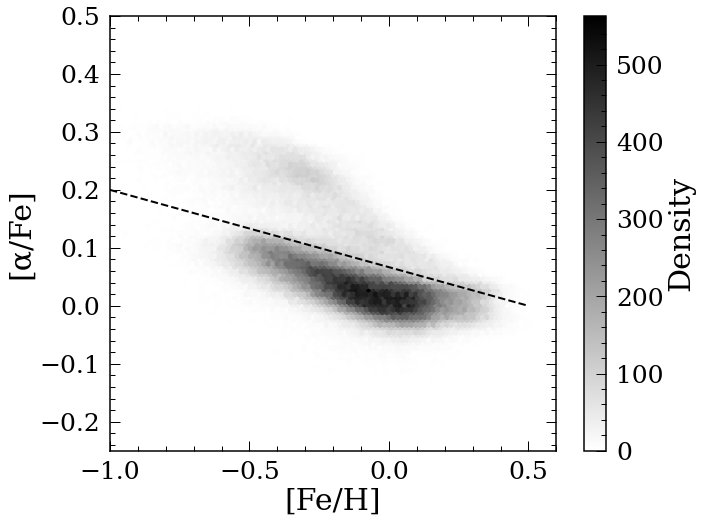

In [197]:
plt.figure(figsize=(10,8))
plt.hexbin(apogee_kinematic['M_H'],apogee_kinematic['ALPHA_M'],
          extent=(-1,0.6,-0.25,0.5),cmap='binary')

p = fitpoints([-1,0.5],[0.2,0])
plt.plot([-1,0.5], p([-1,0.5]), 'k--')
apogee_kinematic['hi_alpha'] = (apogee_kinematic['ALPHA_M']-p(apogee_kinematic['M_H']))>0

cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
plt.xlim([-1,0.6])
plt.ylim([-0.25,0.5])



# azimuthal AMR

In [327]:

def getave_amr(age,feh):
    Nbin=30
    febins=np.linspace(-1,0.5,Nbin)
    
    meanage=np.zeros(Nbin-1)
    meanage_err=np.zeros(Nbin-1)
    meanfeh=np.zeros(Nbin-1)
    starnumb=np.zeros(Nbin-1)
    
    for i in range(Nbin-1):
        binlow=febins[i]
        binhi=febins[i+1]

        m=(feh>=binlow)&(feh<=binhi)
        
        if sum(m)<10:
            continue
        meanfeh[i]=(binlow+binhi)/2
        meanage[i]=np.median(age[m])
        meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
    return meanfeh,meanage,meanage_err



def getAMR(df, r, angle):
    x_sr = -r*np.cos(-angle)
    y_sr = r*np.sin(-angle)
    
    #print(x_sr, y_sr)
    distsol = 2
    m = (((df['x']-x_sr)**2+(df['y']-y_sr)**2)<distsol**2)
    df_sn = df[m].reset_index(drop=True)
    
    # col normalized 
    H, yedges, xedges = np.histogram2d(df_sn['kin_age'], 
                                       df_sn['M_H'], 
                                       bins=(np.linspace(2,20,30),
                                        np.linspace(-1,0.5,30)))
    for i in range(len(yedges)-1):
        m = (df_sn['kin_age']>yedges[i])&(df_sn['kin_age']<yedges[i+1])
        H[i,:] = H[i,:]/sum(m)

    for i in range(len(H[0,:])):
        for j in range(len(H[:,0])):
            if H[j,i] == 0:
                H[j,i] = np.nan
    
    meanfeh, meanage, meanage_err = getave_amr(df_sn['kin_age'].values,df_sn['M_H'].values)
    
    return yedges, xedges, H.T, len(df_sn), x_sr, y_sr, meanfeh, meanage, meanage_err






    

In [232]:
lowalpha = apogee_kinematic.loc[apogee_kinematic['hi_alpha']==0].reset_index(drop=True)
print(len(lowalpha_lowz))


155127


  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-327-151741d977c5>:41: RuntimeWarning: invalid value encountered in true_divide
  H[i,:] = H[i,:]/sum(m)
<ipython-input-327-151741d977c5>:41: RuntimeWarning: invalid value encountered in true_divide
  H[i,:] = H[i,:]/sum(m)
<ipython-input-327-151741d977c5>:41: RuntimeWarning: invalid value encountered in true_divide
  H[i,:] = H[i,:]/sum(m)
 20%|██        | 1/5 [00:00<00:01,  2.12it/s]<ipython-input-327-151741d977c5>:41: RuntimeWarning: invalid value encountered in true_divide
  H[i,:] = H[i,:]/sum(m)
 40%|████      | 2/5 [00:05<00:09,  3.08s/it]<ipython-input-327-151741d977c5>:41: RuntimeWarning: invalid value encountered in true_divide
  H[i,:] = H[i,:]/sum(m)
 60%|██████    | 3/5 [00:18<00:15,  7.80s/it]<ipython-input-327-151741d977c5>:41: RuntimeWarning: invalid value encountered in true_divide
  H[i,:] = H[i,:]/sum(m)
 80%|████████  | 4/5 [00:22<00:06,  6.03s/it]<ipython-input-327-151741d977c5>:41: RuntimeWarning: invalid value en

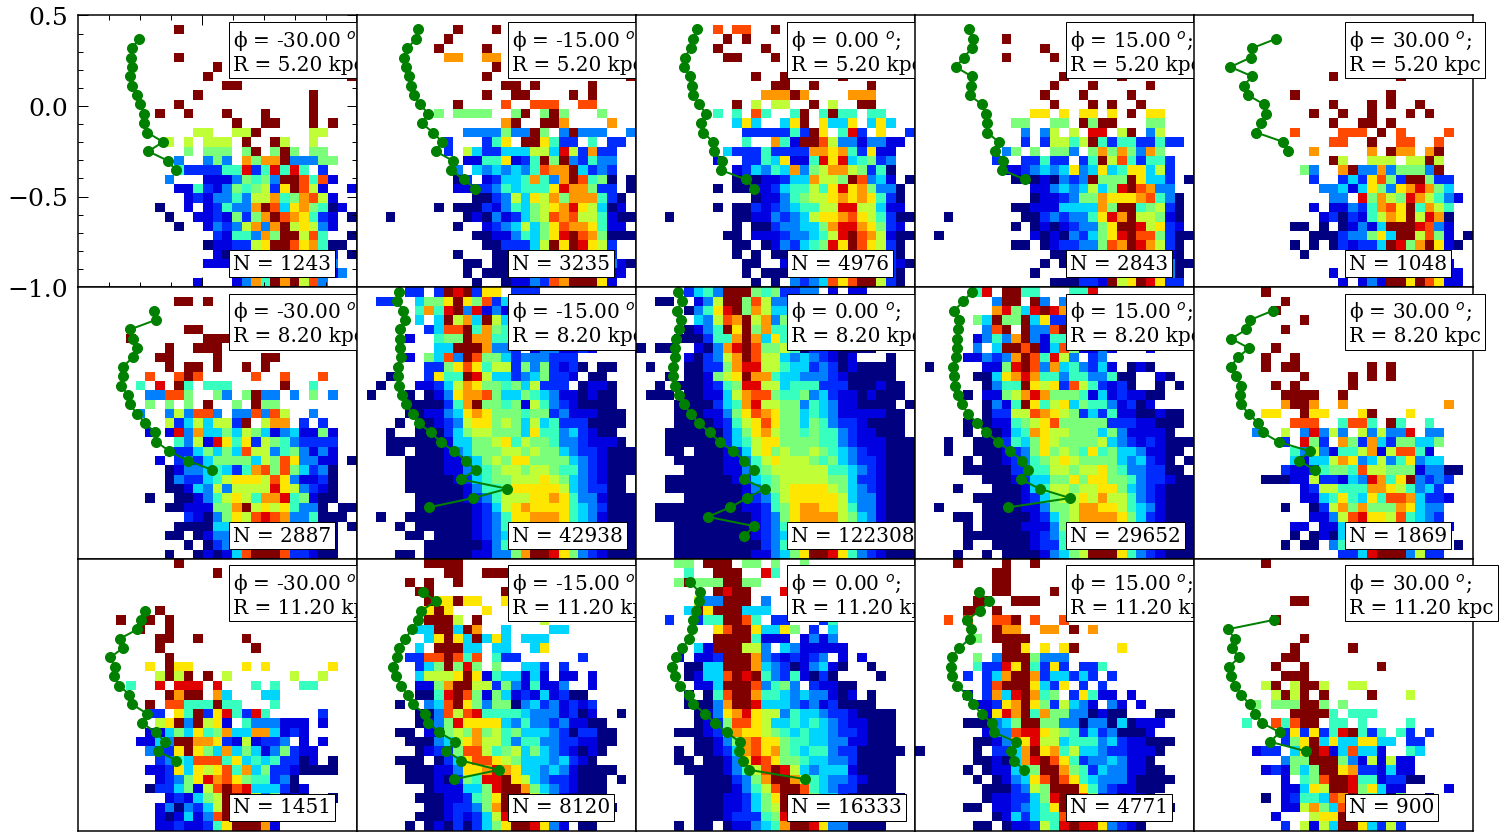

In [328]:
splitr, splitangle = 3, 5
rs = np.linspace(8.2-3, 8.2+3, splitr)
angles = np.linspace(-30*np.pi/180, 30*np.pi/180, splitangle)

srx, sry = [], []

rs_all, angles_all, meanage_all, meanfeh_all, meanageerr_all = [], [], [], [], []

fig, ax = plt.subplots(figsize=(5*splitangle,5*splitr), nrows=splitr, 
                       ncols=splitangle, gridspec_kw={'hspace': 0, 'wspace': 0})
for i in trange(len(angles)):
    for j in range(len(rs)):
        yedges, xedges, H, nos, xsr, ysr, meanfeh, meanage, meanage_err = getAMR(lowalpha_lowz, rs[j], angles[i])
        
        srx.append(xsr)
        sry.append(ysr)
        
        rs_all.append(rs[j])
        angles_all.append(angles[i])
        meanage_all.append(meanage)
        meanfeh_all.append(meanfeh)
        meanageerr_all.append(meanage_err)
        
        
        ax[j,i].pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.15)
        mm = (meanage!=0)
        ax[j,i].plot(meanage[mm], meanfeh[mm], 'go-', markersize=10)
        ax[j,i].text(12, 0.2, 'ϕ = %.2f $^o$;\nR = %.2f kpc'%(angles[i]*180/np.pi,
                                                              rs[j]), 
                     fontsize=20, bbox=dict(facecolor='white', edgecolor='black'))
        ax[j,i].text(12, -0.9, 'N = %d'%(nos), fontsize=20, 
                     bbox=dict(facecolor='white', edgecolor='black'))
        if j!=0 or i!=0:
            ax[j,i].set_xticks([])
            ax[j,i].set_yticks([])
        ax[j,i].set_xlim([2,20])
        ax[j,i].set_ylim([-1,0.5])


plt.savefig('Angle_R.png')

Text(0, 0.5, 'Y')

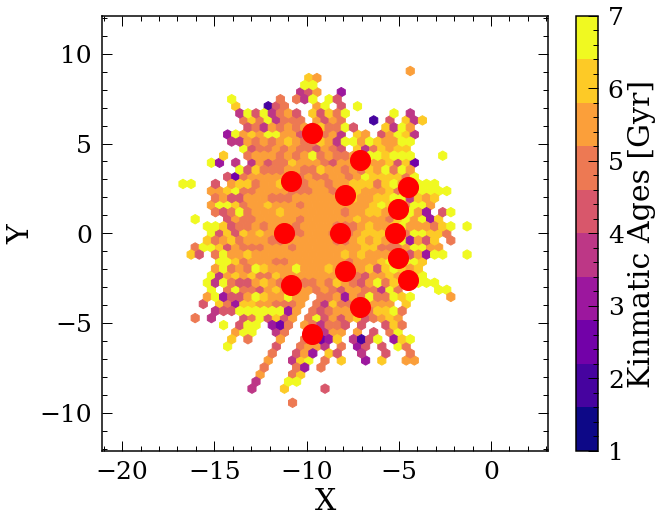

In [329]:

plt.figure(figsize=(10,8))
plt.hexbin(lowalpha_lowz['x'], lowalpha_lowz['y'],
           C=lowalpha_lowz['kin_age'],vmin=1, vmax=7,
          extent=(-20,2,-11,11), gridsize=50, mincnt=1,
           reduce_C_function=np.median, cmap = plt.cm.get_cmap('plasma',10))

plt.plot(srx,sry,'ro',markersize=20)

cb = plt.colorbar()
cb.set_label('Kinmatic Ages [Gyr]')
plt.xlabel('X')
plt.ylabel('Y')

In [330]:
m = ([i==8.2 for i in rs_all])

In [331]:
angles_sr = np.array(angles_all)[m]
meanage_sr = np.array(meanage_all)[m]
meanfeh_sr = np.array(meanfeh_all)[m]
meanageerr_sr = np.array(meanageerr_all)[m]


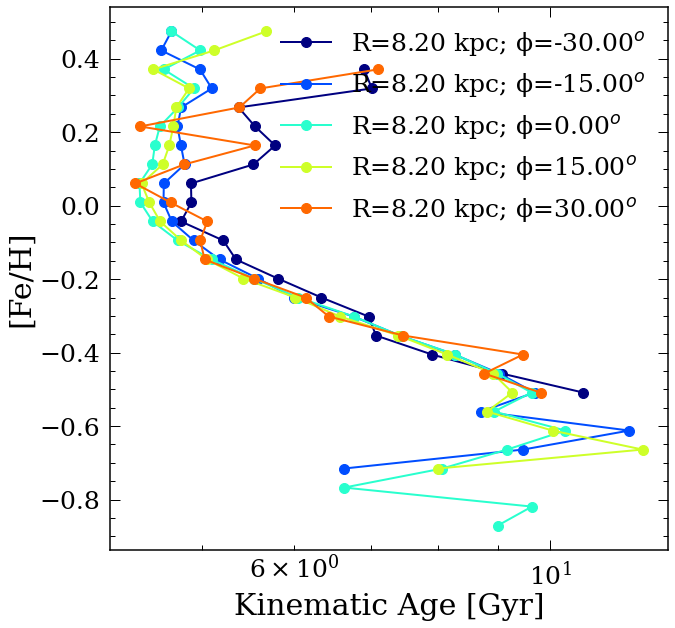

In [334]:
from scipy.ndimage import gaussian_filter1d
colors = getcolor(range(len(angles_sr)+1))
for i in range(len(angles_sr)):
    mm = (meanage_sr[i]!=0)
    plt.plot(meanage_sr[i][mm], meanfeh_sr[i][mm], 'o-', color=colors[i],
            label='R=%.2f kpc; ϕ=%.2f$^o$'%(8.2, angles_sr[i]*180/np.pi),
            markersize=10)
    smoothfeh = gaussian_filter1d(meanfeh_sr[i][mm],5)
    #plt.plot(meanage_sr[i][mm], smoothfeh, '-', color=colors[i])
    
plt.xscale('log')
plt.legend()
plt.xlabel('Kinematic Age [Gyr]')
plt.ylabel('[Fe/H]')

plt.savefig('SN.png')

Text(0, 0.5, 'Y')

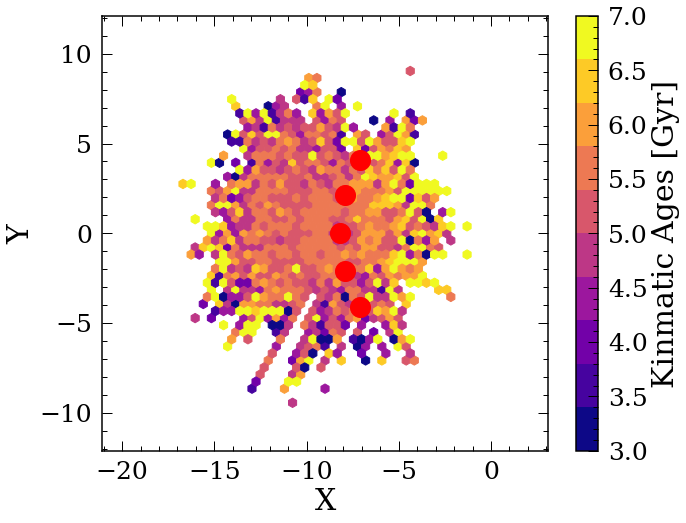

In [342]:

plt.figure(figsize=(10,8))
plt.hexbin(lowalpha_lowz['x'], lowalpha_lowz['y'],
           C=lowalpha_lowz['kin_age'],vmin=3, vmax=7,
          extent=(-20,2,-11,11), gridsize=50, mincnt=1,
           reduce_C_function=np.median, cmap = plt.cm.get_cmap('plasma',10))

plt.plot(np.array(srx)[m], np.array(sry)[m],'ro',markersize=20)

cb = plt.colorbar()
cb.set_label('Kinmatic Ages [Gyr]')
plt.xlabel('X')
plt.ylabel('Y')


Text(0, 0.5, 'Y')

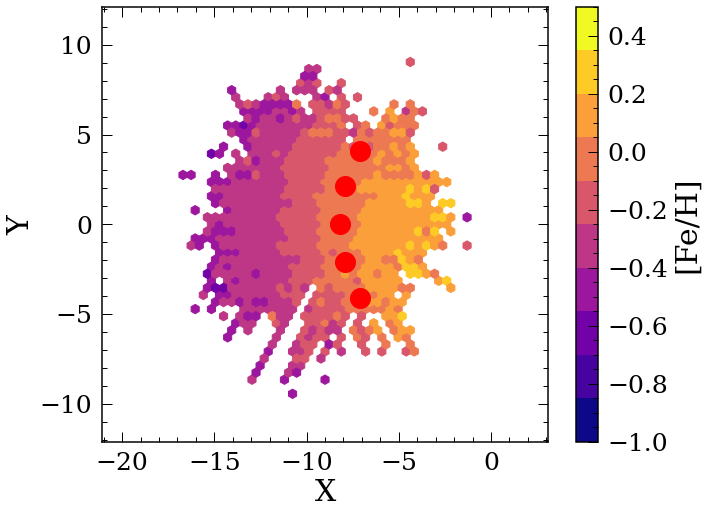

In [347]:

plt.figure(figsize=(10,8))
plt.hexbin(lowalpha_lowz['x'], lowalpha_lowz['y'],
           C=lowalpha_lowz['M_H'],vmin=-1, vmax=0.5,
          extent=(-20,2,-11,11), gridsize=50, mincnt=1,
           reduce_C_function=np.median, cmap = plt.cm.get_cmap('plasma',10))

plt.plot(np.array(srx)[m], np.array(sry)[m],'ro',markersize=20)

cb = plt.colorbar()
cb.set_label('[Fe/H]')
plt.xlabel('X')
plt.ylabel('Y')



In [388]:
abunds = [i for i in lowalpha_lowz.columns if '_FE' in i]
abunds.append('M_H')
print(abunds)


['N_FE', 'C_FE', 'CI_FE', 'O_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'P_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'CR_FE', 'MN_FE', 'NI_FE', 'CU_FE', 'YB_FE', 'M_H']


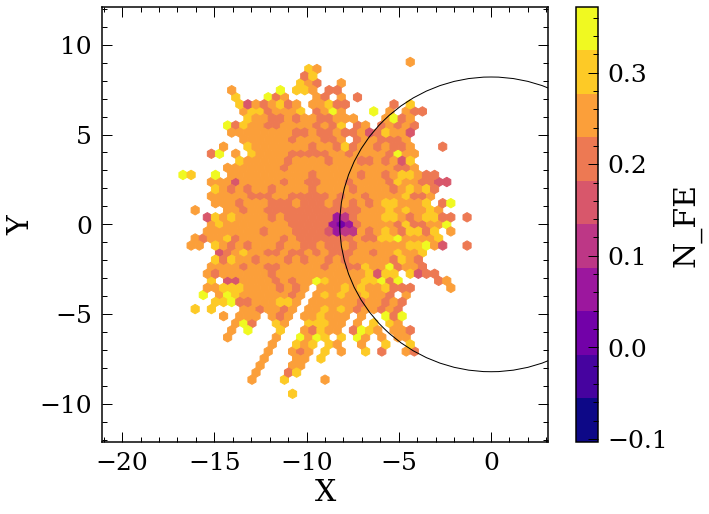

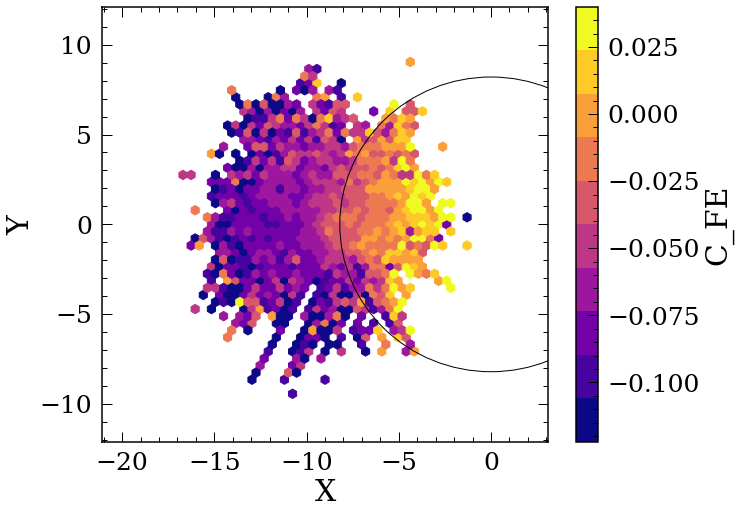

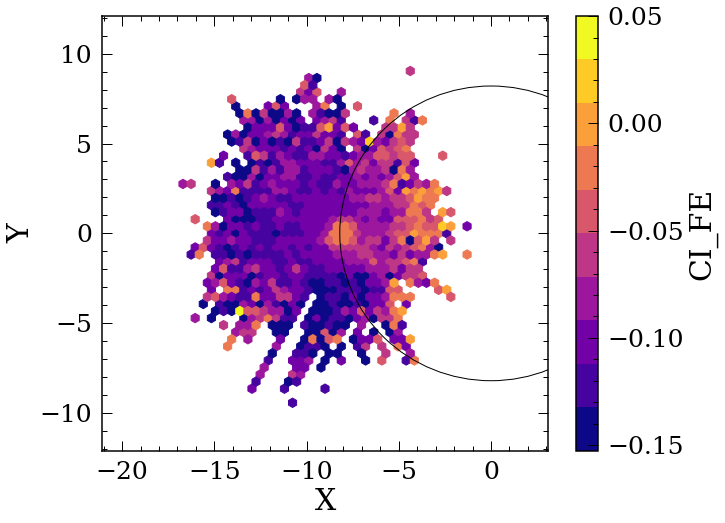

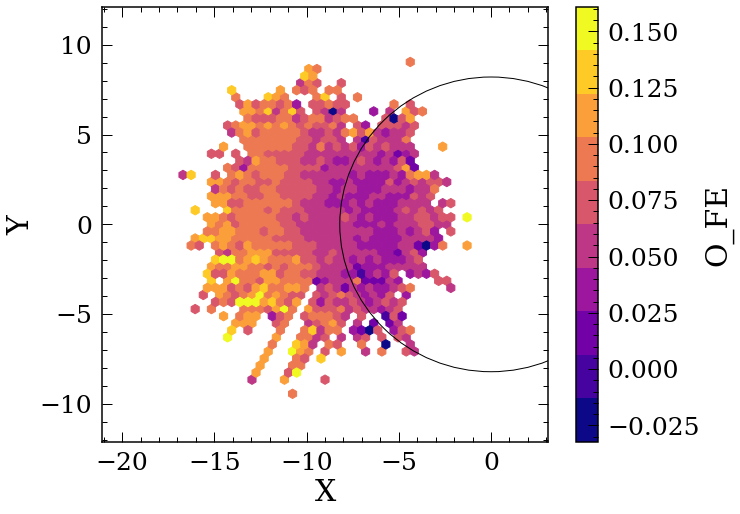

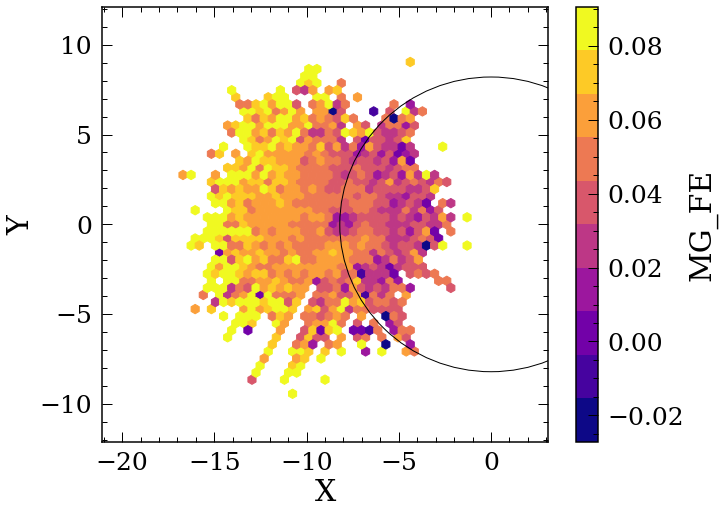

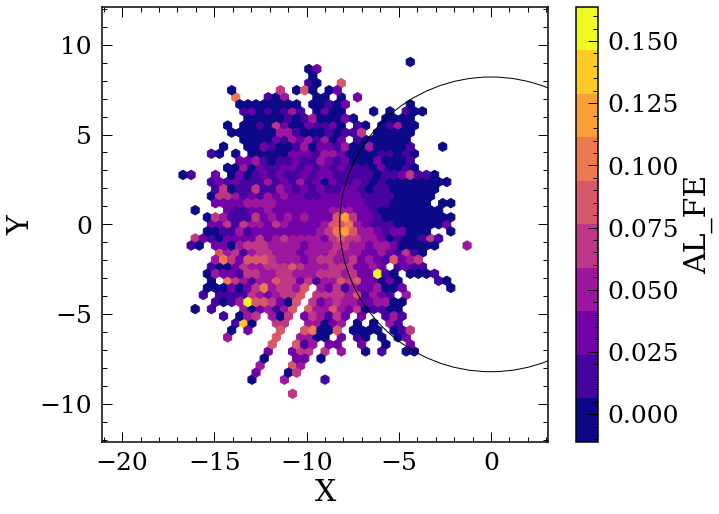

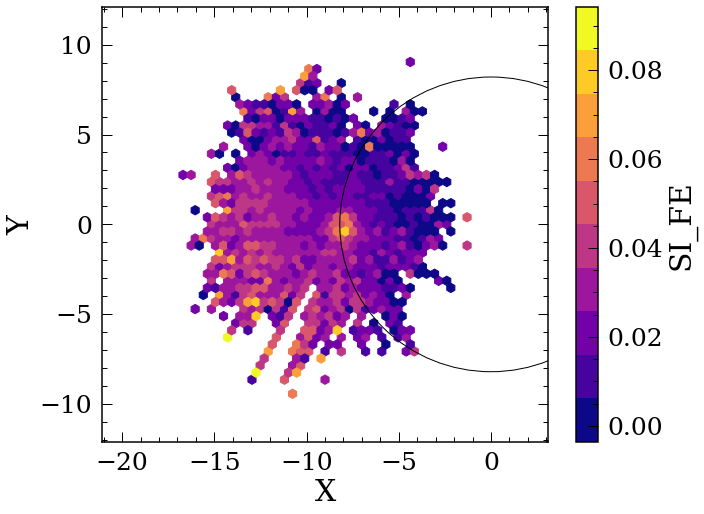

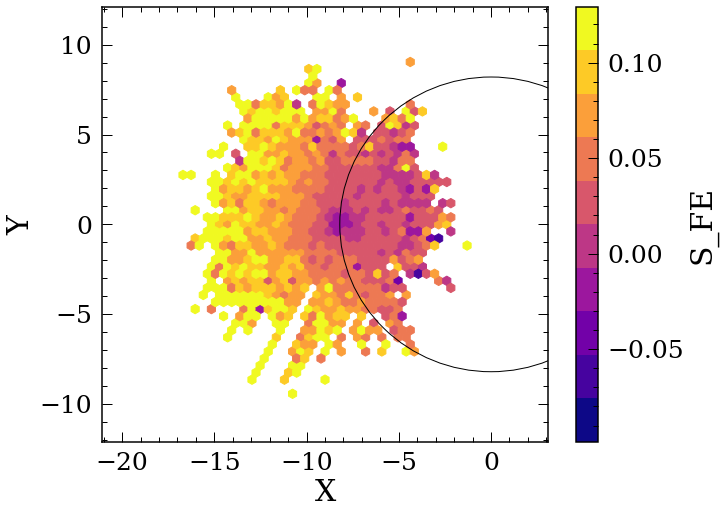

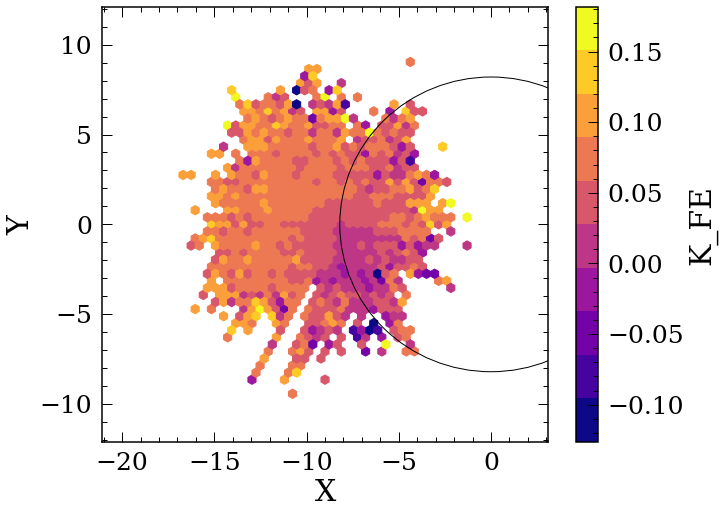

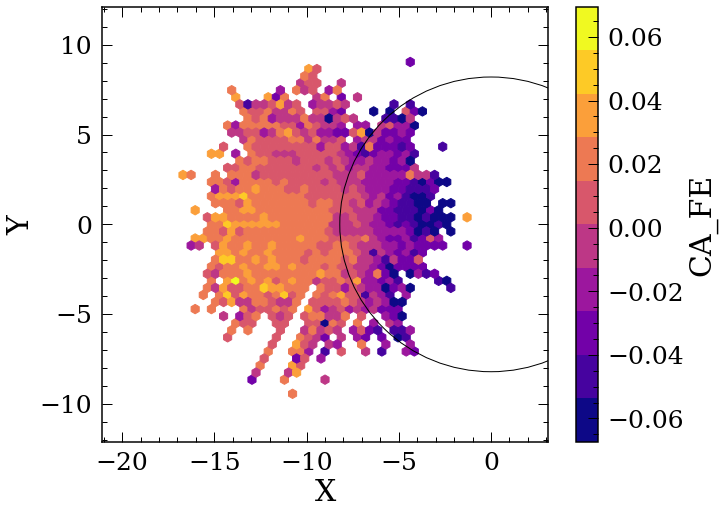

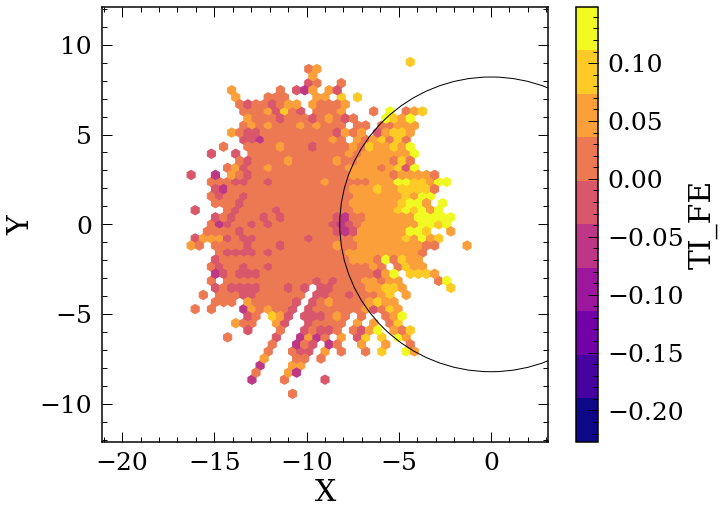

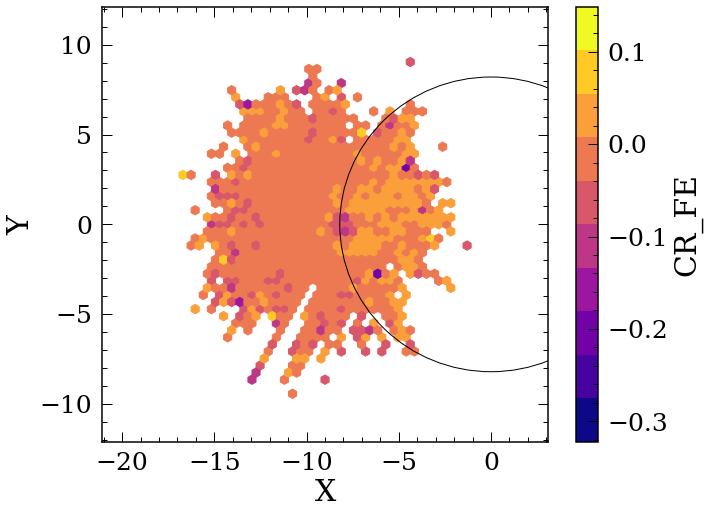

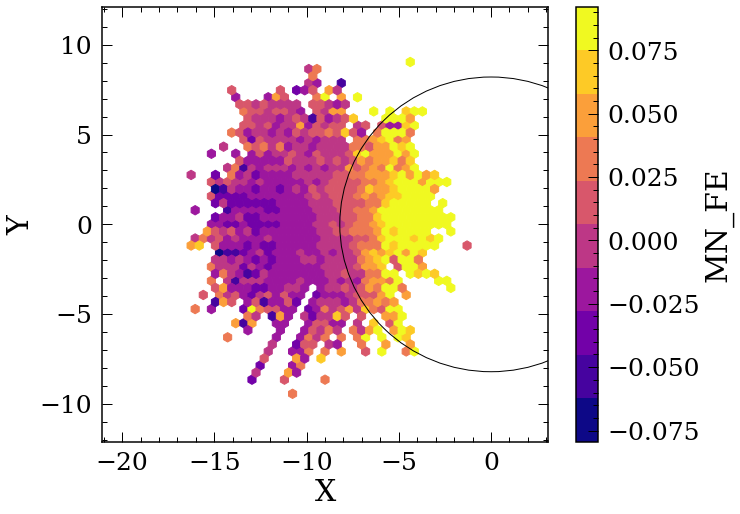

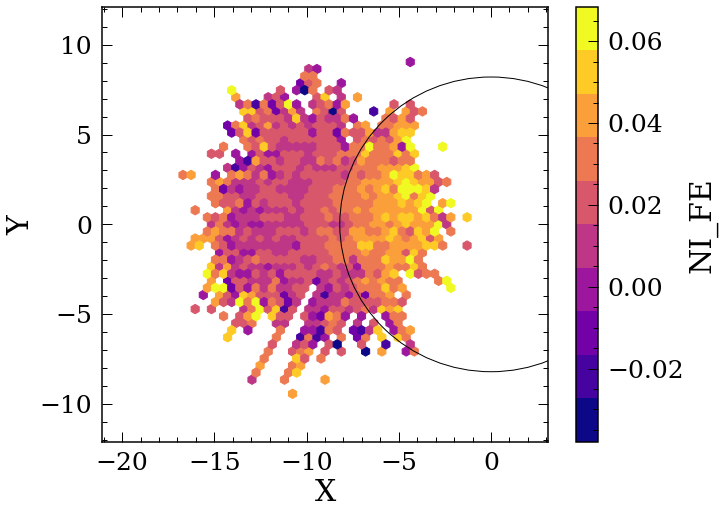

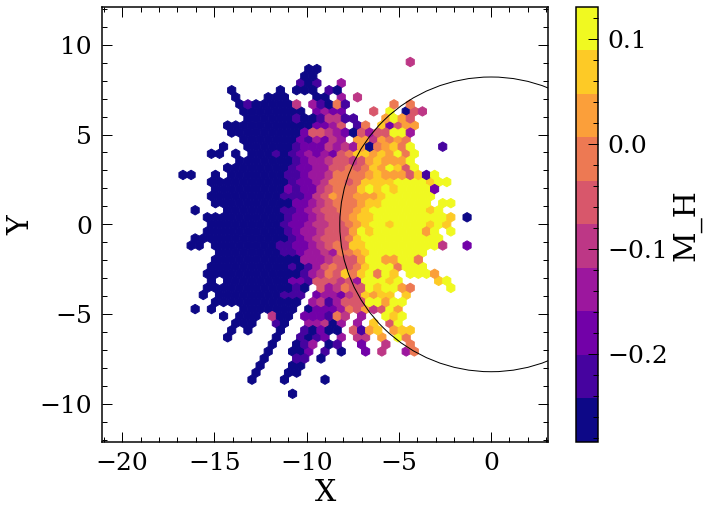

In [396]:
for i in range(len(abunds)):
    means = np.mean(lowalpha_lowz[abunds[i]])
    stds = np.std(lowalpha_lowz[abunds[i]])
    if len(lowalpha_lowz[abunds[i]].dropna())<1000:
        continue
    plt.figure(figsize=(10,8))
    plt.hexbin(lowalpha_lowz['x'], lowalpha_lowz['y'],
               C=lowalpha_lowz[abunds[i]],vmin=means-stds, vmax=means+stds,
              extent=(-20,2,-11,11), gridsize=50, mincnt=1,
               reduce_C_function=np.median, cmap = plt.cm.get_cmap('plasma',10))
    c = plt.Circle((0,0), 8.2, color='k', fill=False)
    plt.gca().add_artist(c)

    cb = plt.colorbar()
    cb.set_label(abunds[i])
    plt.xlabel('X')
    plt.ylabel('Y')

